Task Performed


---



1. Data Cleaning and Preprocessing
Handling Missing Values: Identified and addressed any missing data in the dataset.
Outlier Detection and Removal:
Used Interquartile Range (IQR) to identify and remove outliers from the dataset.
Normalization and Standardization: Ensured the data was appropriately scaled for analysis.
2. Descriptive Statistics
Summary Statistics: Calculated measures such as mean, median, standard deviation, and kurtosis for numerical variables.
Data Distribution Analysis:
Used histograms, boxplots, and density plots to understand the distribution of various numerical columns.
Checked for skewness and kurtosis to assess the shape of the data distribution.
3. Correlation Analysis
Pearson Correlation: Initially considered for analyzing the relationship between numerical variables but found unsuitable due to non-normal distribution.
Spearman Correlation: Used to assess the monotonic relationships between variables, considering the non-normal distribution of the data.
Key Insight: Found a strong negative correlation between discount levels and profit margins, suggesting that higher discounts lead to lower profits.
4. ANOVA (Analysis of Variance)
One-Way ANOVA:
Performed to analyze the difference in profit across different regions.
Conducted a similar analysis for profit across newly created random regional groups.
Result: Determined whether there were statistically significant differences in the mean profits among different regions.
Normality and Homogeneity of Variance Checks:
Conducted normality checks using QQ plots and the Shapiro-Wilk test.
Assessed homogeneity of variance using Levene's test.
5. Kruskal-Wallis Test
As the data did not meet the assumptions of ANOVA (normality), the non-parametric Kruskal-Wallis test was performed.
Result: Analyzed the differences in profit medians across different regions, particularly when the assumptions of ANOVA were violated.
6. Profitability and Regional Analysis
Top and Bottom Cities by Profit: Identified the cities with the highest and lowest profit margins.
Regional Profitability:
Compared total profits across different regions.
Examined profit trends across different months to understand seasonality.
7. Impact of Discounts on Profit
Analyzed how different discount levels impact profit margins, highlighting a significant negative correlation.
Key Insight: Higher discounts were associated with lower profits, a critical finding for pricing strategy optimization.
8. Shipping Cost Analysis
Top and Bottom Cities by Shipping Cost: Analyzed cities with the highest and lowest shipping costs.
Average Shipping Cost: Calculated and compared average shipping costs across different cities.
9. Customer Analysis
Number of Customers by City: Determined the number of customers in each city.
Customer Segmentation: Analyzed customer distribution across different regions and categories.
10. Product Analysis
Top-Selling Products: Identified products with the highest sales volumes.
High vs. Low Margin Products: Differentiated between products with high and low profit margins.
11. Seasonality Analysis
Sales Trends Across Months: Analyzed sales trends over different months to identify any seasonal patterns.

In [1]:
import numpy as np


In [2]:
!pip install kaggle


In [3]:
from google.colab import files

# This will prompt you to upload your kaggle.json file
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"aisurjyasamantaray","key":"c1057c1c4050fe25223f0d88d9a615c7"}'}

In [4]:
!ls


'kaggle (2).json'   sample_data


In [5]:
!mkdir -p ~/.kaggle


In [6]:
!mv "kaggle (2).json" ~/.kaggle/kaggle.json


In [7]:
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!ls -l ~/.kaggle


total 4
-rw------- 1 root root 74 Aug 21 15:37 kaggle.json


In [9]:
!cat ~/.kaggle/kaggle.json


{"username":"aisurjyasamantaray","key":"c1057c1c4050fe25223f0d88d9a615c7"}

In [10]:
!kaggle datasets list


ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                    3MB  2024-08-09 17:52:25           4390         99  1.0              
berkayalan/paris-2024-olympics-medals                          Paris 2024 Olympics Medals                        1KB  2024-08-14 11:02:45           2069         45  1.0              
haseebindata/student-performance-predictions                   Student Performance Predictions                   9KB  2024-08-17 06:57:57           1285         31  0.9411765        
krupalpatel07/tesla-stock-data                                 Tesla Stock Data      

In [11]:
!kaggle datasets download -d apoorvaappz/global-super-store-dataset


Dataset URL: https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset
License(s): DbCL-1.0
 72% 8.00M/11.1M [00:00<00:00, 82.2MB/s]
100% 11.1M/11.1M [00:00<00:00, 42.6MB/s]


In [12]:
import zipfile

# Unzip the downloaded file
with zipfile.ZipFile('global-super-store-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [13]:
import os

# List the files in the dataset directory
os.listdir('dataset')

['Global_Superstore2.xlsx', 'Global_Superstore2.csv']

In [14]:
import pandas as pd

# Try reading with different encodings
try:
    df = pd.read_csv('dataset/Global_Superstore2.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('dataset/Global_Superstore2.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [15]:
data = df.copy()
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


Exploring dataset using different functions. This helps to understand the dataset and its columns accurately.

Some columns like order date and shipping date have been showing as "Object" which need to be converted into Datetime.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [17]:
data['Market'].value_counts()

,count
Market,
APAC,11002
LATAM,10294
EU,10000
US,9994
EMEA,5029
Africa,4587
Canada,384


In [18]:
data['City'].value_counts()

,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Santo Domingo,443
...,...
Vesoul,1
Várzea Grande,1
Luanshya,1


In [19]:
data['Country'].value_counts()

,count
Country,
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065
...,...
Bahrain,2
South Sudan,2
Chad,2


In [20]:
data['Region'].value_counts()

,count
Region,
Central,11117
South,6645
EMEA,5029
North,4785
Africa,4587
Oceania,3487
West,3203
Southeast Asia,3129
East,2848


In [21]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [22]:
data['Postal Code'] = data['Postal Code'].fillna('Unknown')

In [23]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [24]:
data.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [25]:
data.nunique()

,0
Row ID,51290
Order ID,25035
Order Date,1430
Ship Date,1464
Ship Mode,4
Customer ID,1590
Customer Name,795
Segment,3
City,3636
State,1094


In [26]:
data['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


In [27]:
data['Category'].value_counts()

,count
Category,
Office Supplies,31273
Technology,10141
Furniture,9876


In [28]:
#converting the incorrect objects to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

<ipython-input-28-399f8a8b0dd2>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
<ipython-input-28-399f8a8b0dd2>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

**Basic analysis based on Sales**

In [30]:
#What are the top 5 countries with the highest total sales?

top_countries = data.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)
top_countries

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05


In [31]:
#What are the top 5 cities with the highest total profit?

top_cites = data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)
top_cites

,Profit
City,
New York City,62036.98370
Los Angeles,30440.75790
Seattle,29156.09670
Managua,17853.71804
San Francisco,17507.38540


In [32]:
#What are the top 5 product categories with the highest total sales?

top_categories = data.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(5)
top_categories

,Sales
Category,
Technology,4.744557e+06
Furniture,4.110874e+06
Office Supplies,3.787070e+06


In [33]:
#Find the top 5 most profitable products and their total profit.

top_products = data.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
top_products

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730


In [34]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [36]:
data['month'] = data['Order Date'].dt.month

In [37]:


import matplotlib.pyplot as plt
import seaborn as sns

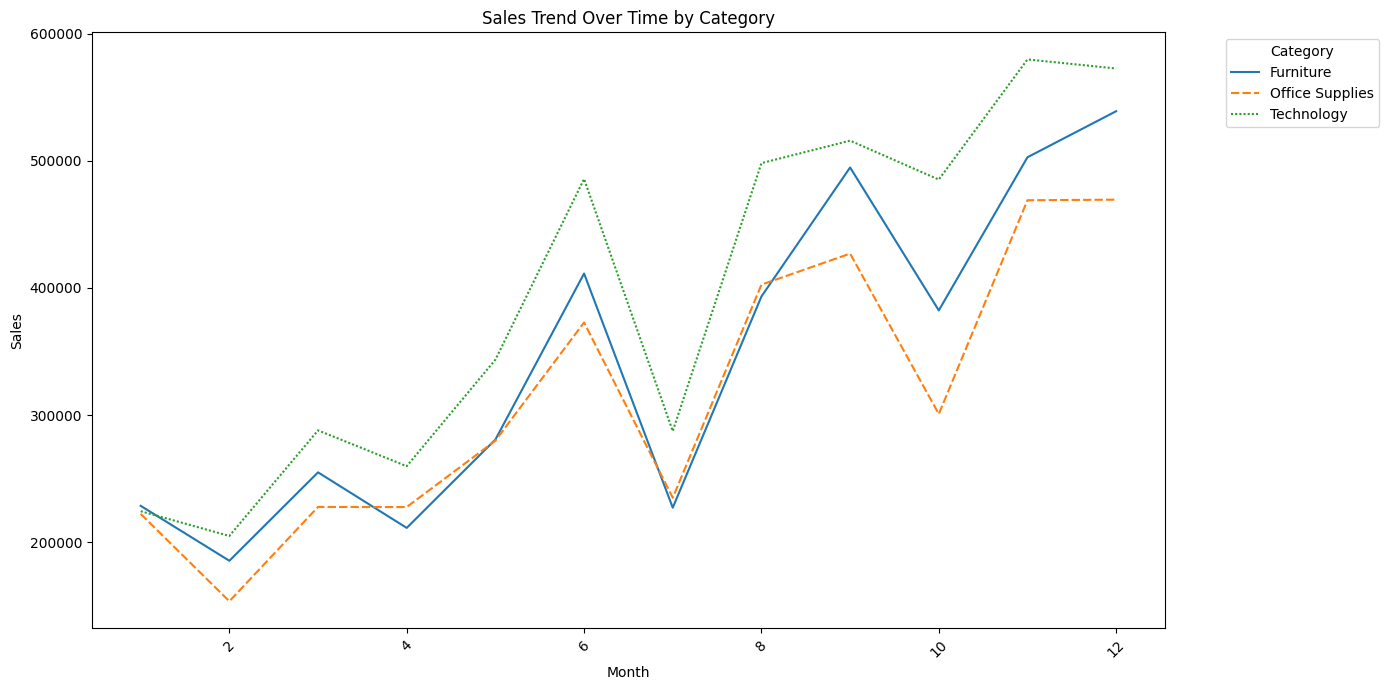

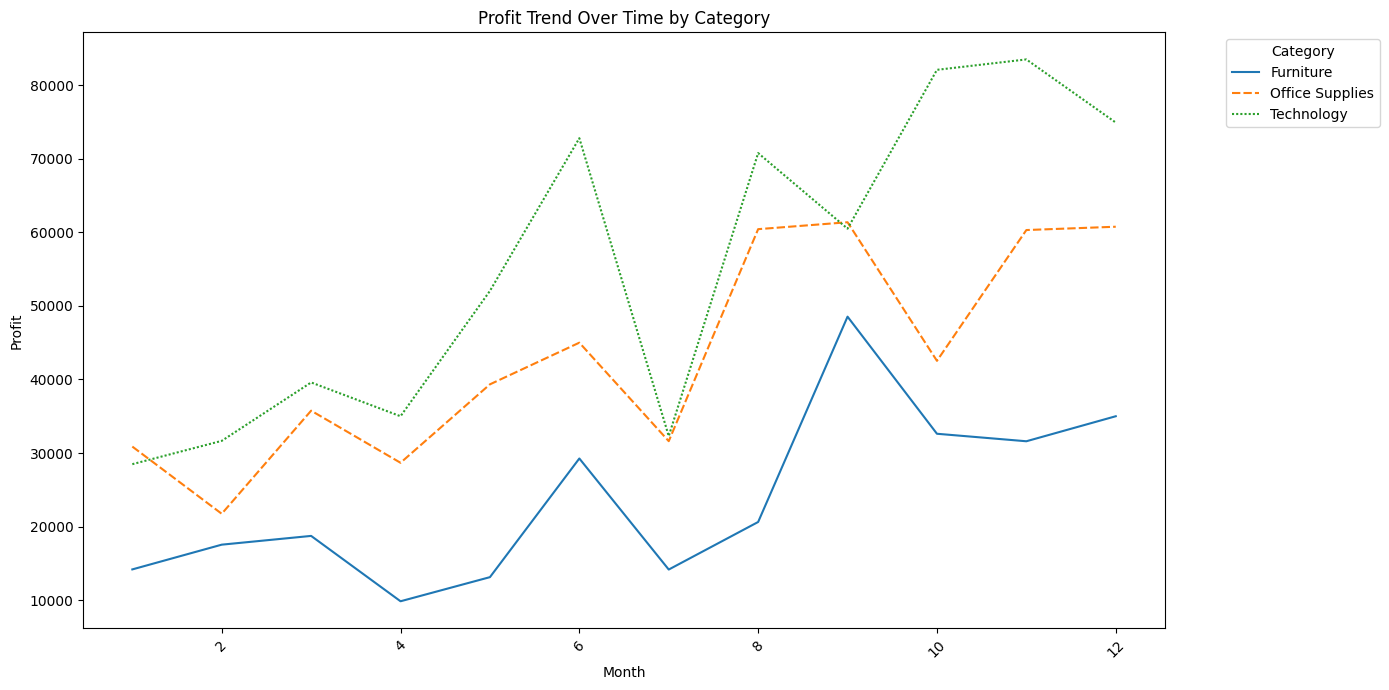

In [38]:
#How do sales and profit trends differ by product category    over time?
sales_trends = data.groupby(['month', 'Category'])['Sales'].sum().reset_index()
profit_trends = data.groupby(['month', 'Category'])['Profit'].sum().reset_index()

# Pivot tables for better plotting
sales_pivot = sales_trends.pivot(index='month', columns='Category', values='Sales')
profit_pivot = profit_trends.pivot(index='month', columns='Category', values='Profit')

# Plot Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_pivot)
plt.title('Sales Trend Over Time by Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Profit Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=profit_pivot)
plt.title('Profit Trend Over Time by Category')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:







data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2


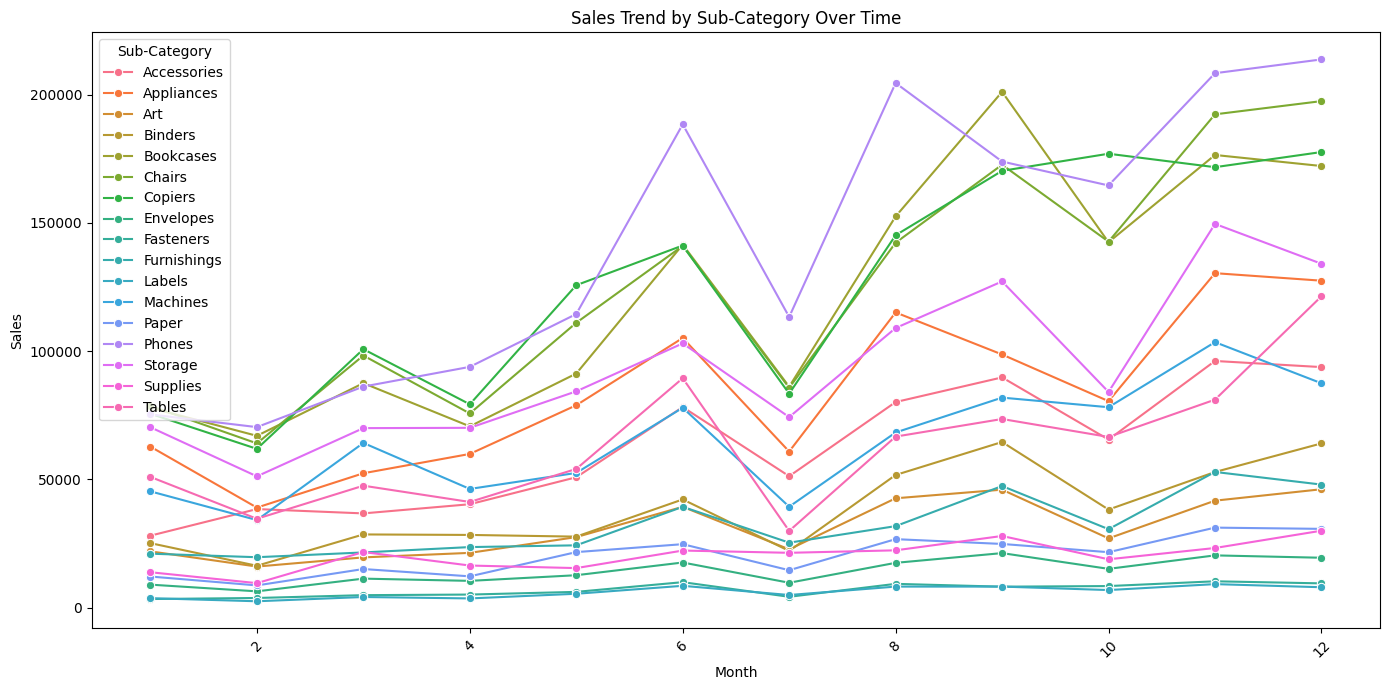

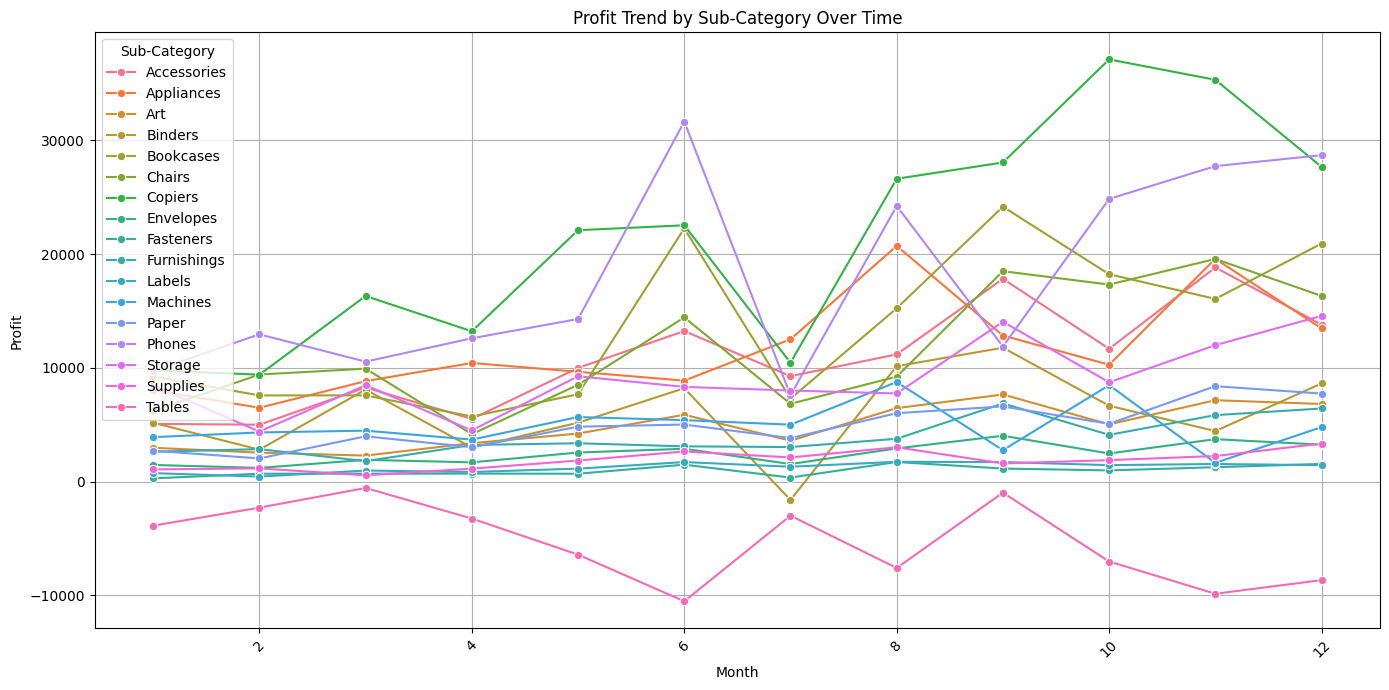

In [40]:
#How do sales and profit trends differ by product sub-category over time?

sub_sales_trend = data.groupby(['month', 'Sub-Category'])['Sales'].sum().reset_index()
sub_profit_trend = data.groupby(['month','Sub-Category'])['Profit'].sum().reset_index()

#pivoting
sub_sales_pivot = sub_sales_trend.pivot(index='month', columns='Sub-Category', values='Sales')
sub_profit_pivot = sub_profit_trend.pivot(index='month', columns='Sub-Category', values='Profit')

#plotting1

sub_sales_trend.reset_index(inplace=True)
sub_profit_trend.reset_index(inplace=True)

# Plot Sales Trend by Sub-Category
plt.figure(figsize=(14, 7))
sns.lineplot(data=sub_sales_trend, x='month', y='Sales', hue='Sub-Category', marker='o')
plt.title('Sales Trend by Sub-Category Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Profit Trend by Sub-Category
plt.figure(figsize=(14, 7))
sns.lineplot(data=sub_profit_trend, x='month', y='Profit', hue='Sub-Category', marker='o')
plt.title('Profit Trend by Sub-Category Over Time')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend(title='Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [41]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,7


In [42]:
#Understanding co relation between discount levels and Profit Margins

data['Profit Margin'] = data['Profit'] / (data['Sales'])
# Calculate correlation between discount and profit margin
correlation = data[['Discount', 'Profit Margin']].corr().iloc[0, 1]
print(f"Correlation between Discount and Profit Margin: {correlation:.2f}")

Correlation between Discount and Profit Margin: -0.85



A correlation of -0.85 indicates a strong negative relationship between discount levels and profit margins. This suggests that as discounts increase, profit margins tend to decrease significantly. Here's how you can interpret this result:

Interpretation:
Strong Negative Correlation: The high negative correlation value of -0.85 means that higher discounts are closely associated with lower profit margins. This is expected because offering larger discounts reduces the revenue generated per sale, thereby squeezing the profit margin.

In [43]:
data['Country'].nunique()

147

In [44]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,month,Profit Margin
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,7,0.33


In [45]:
city_sales = data.groupby('City')['Sales'].agg(['sum', 'mean']).reset_index()
city_sales.columns = ['City', 'Total Sales', 'Average Sales']

# Total and average sales for each state
state_sales = data.groupby('State')['Sales'].agg(['sum', 'mean']).reset_index()
state_sales.columns = ['State', 'Total Sales', 'Average Sales']

# Total and average sales for each country
country_sales = data.groupby('Country')['Sales'].agg(['sum', 'mean']).reset_index()
country_sales.columns = ['Country', 'Total Sales', 'Average Sales']

# Total and average sales for each region
region_sales = data.groupby('Region')['Sales'].agg(['sum', 'mean']).reset_index()
region_sales.columns = ['Region', 'Total Sales', 'Average Sales']

Profitability Analysis

<ipython-input-46-bfe1072f237e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='City', data=city_profit.head(10), palette='viridis')


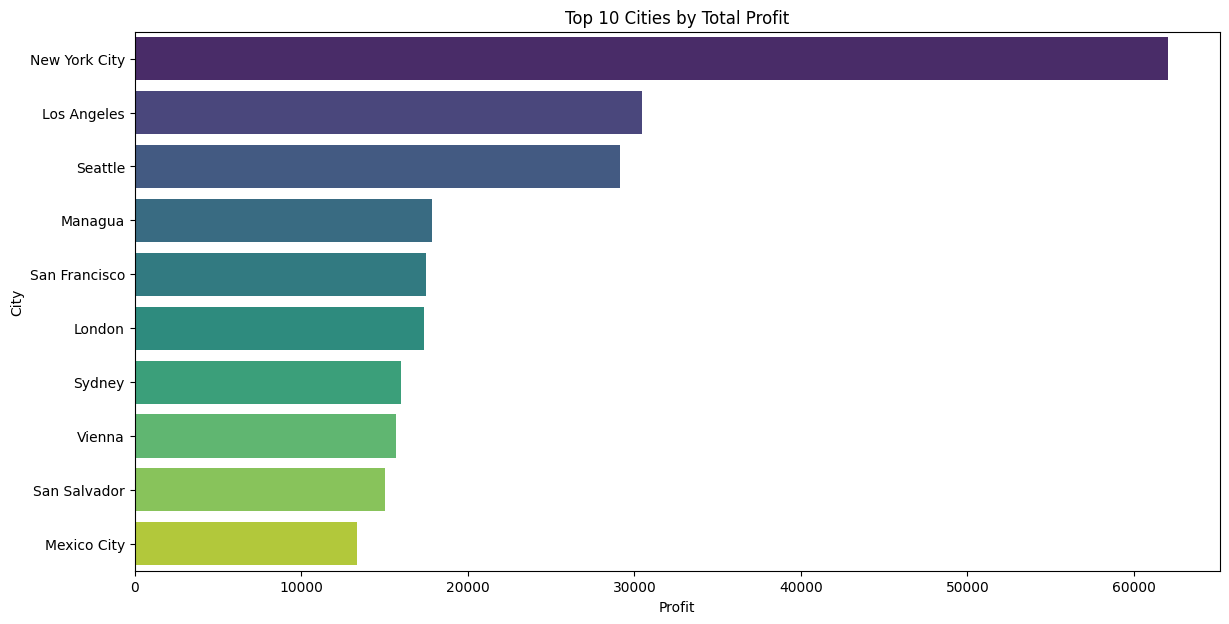

<ipython-input-46-bfe1072f237e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='City', data=city_profit.tail(10), palette='magma')


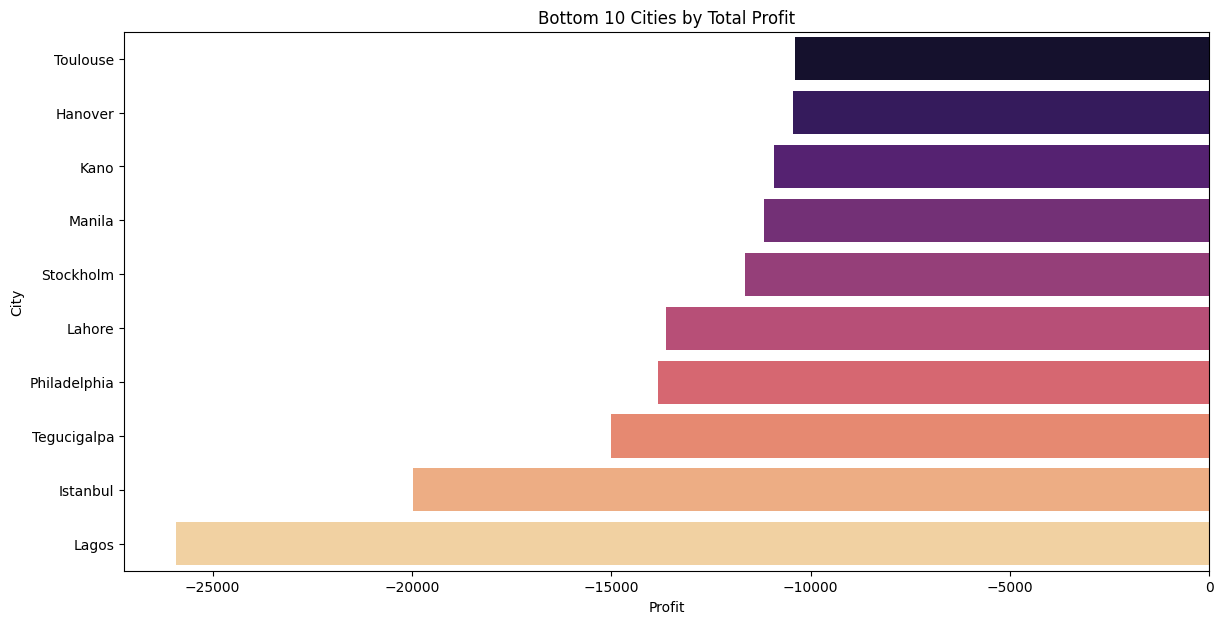

<ipython-input-46-bfe1072f237e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='State', data=state_profit.head(10), palette='viridis')


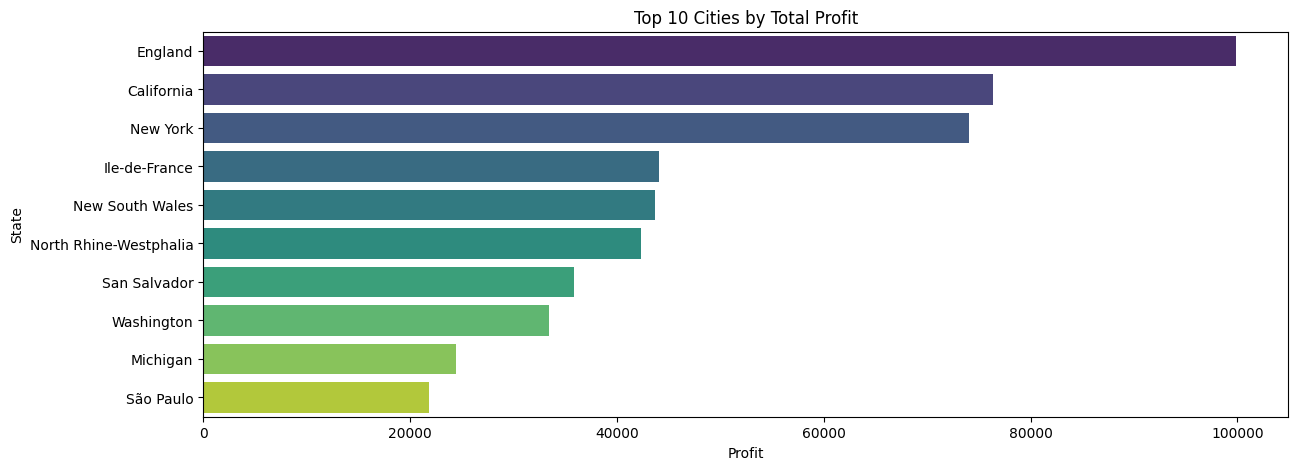

<ipython-input-46-bfe1072f237e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='State', data=state_profit.tail(10), palette='magma')


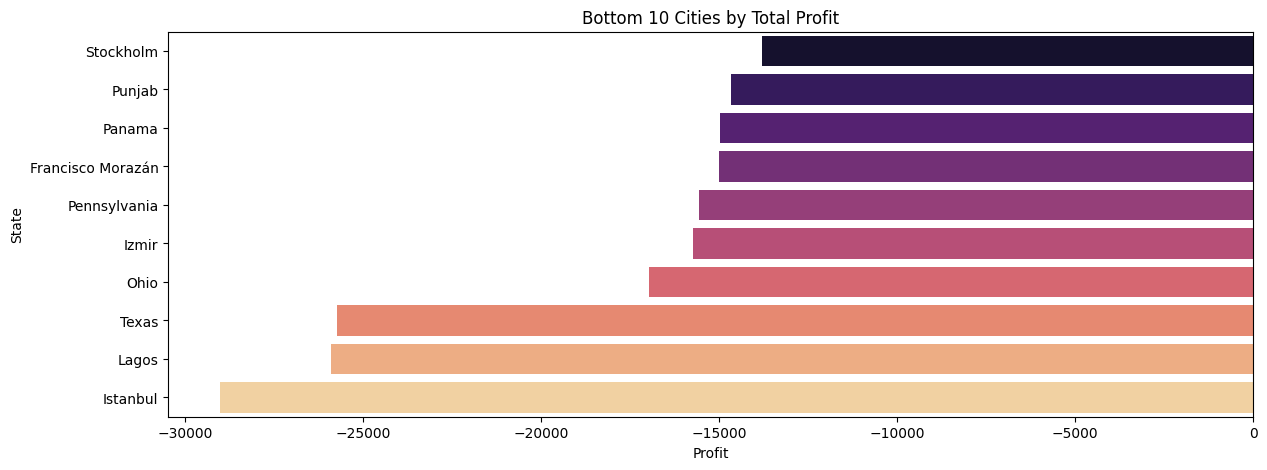

<ipython-input-46-bfe1072f237e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Country', data=Country_profit.head(10), palette='viridis')


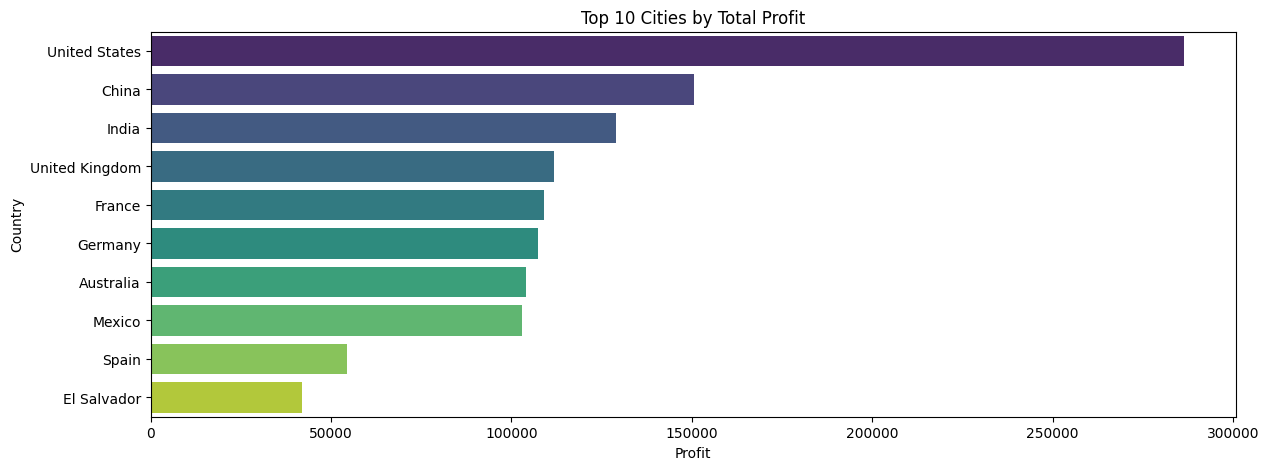

<ipython-input-46-bfe1072f237e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Country', data=Country_profit.tail(10), palette='magma')


Text(0.5, 1.0, 'Bottom 10 Cities by Total Profit')

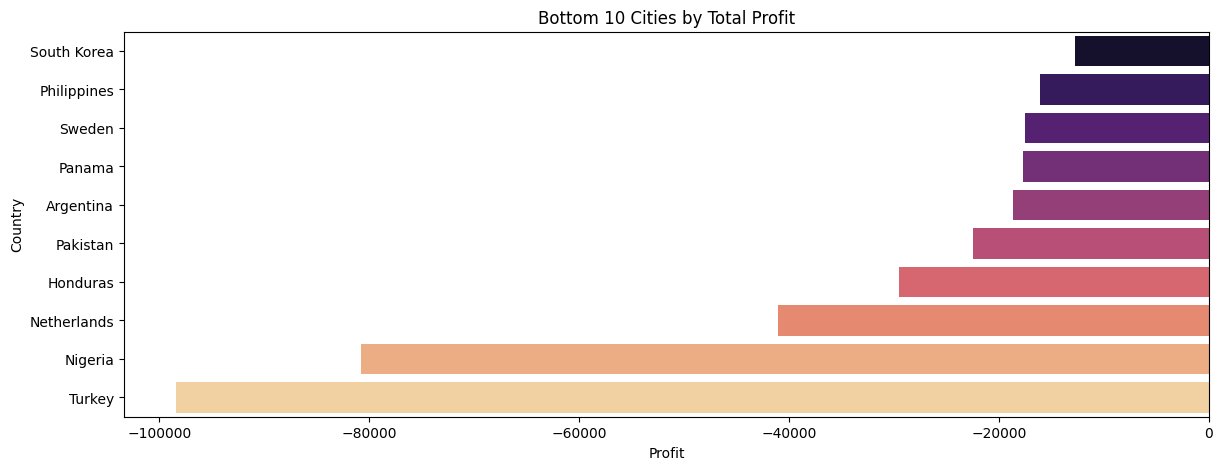

In [46]:
  #Objective: Understand the total profit and profit margins across different locations (city, state, country, region).
  #city
  # Total profit for each city
city_profit = data.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Visualize the top and bottom cities by profit
plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='City', data=city_profit.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Profit')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='City', data=city_profit.tail(10), palette='magma')
plt.title('Bottom 10 Cities by Total Profit')
plt.show()

#state
# Total profit for each State
state_profit = data.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Visualize the top and bottom cities by profit
plt.figure(figsize=(14, 5))
sns.barplot(x='Profit', y='State', data=state_profit.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Profit')
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x='Profit', y='State', data=state_profit.tail(10), palette='magma')
plt.title('Bottom 10 Cities by Total Profit')
plt.show()

#country
# Total profit for each Country
Country_profit = data.groupby('Country')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Visualize the top and bottom cities by profit
plt.figure(figsize=(14, 5))
sns.barplot(x='Profit', y='Country', data=Country_profit.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Profit')
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(x='Profit', y='Country', data=Country_profit.tail(10), palette='magma')
plt.title('Bottom 10 Cities by Total Profit')

In [117]:
city_profit

,City,Profit
2290,New York City,62036.98370
1910,Los Angeles,30440.75790
2936,Seattle,29156.09670
1989,Managua,17853.71804
2843,San Francisco,17507.38540
...,...,...
1760,Lahore,-13626.37200
2499,Philadelphia,-13837.76740
3178,Tegucigalpa,-15007.41608
1482,Istanbul,-19960.90800


<ipython-input-47-4d2cbfbdebe9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit_Margin', y='City', data=city_profit_margin.head(10), palette='coolwarm')


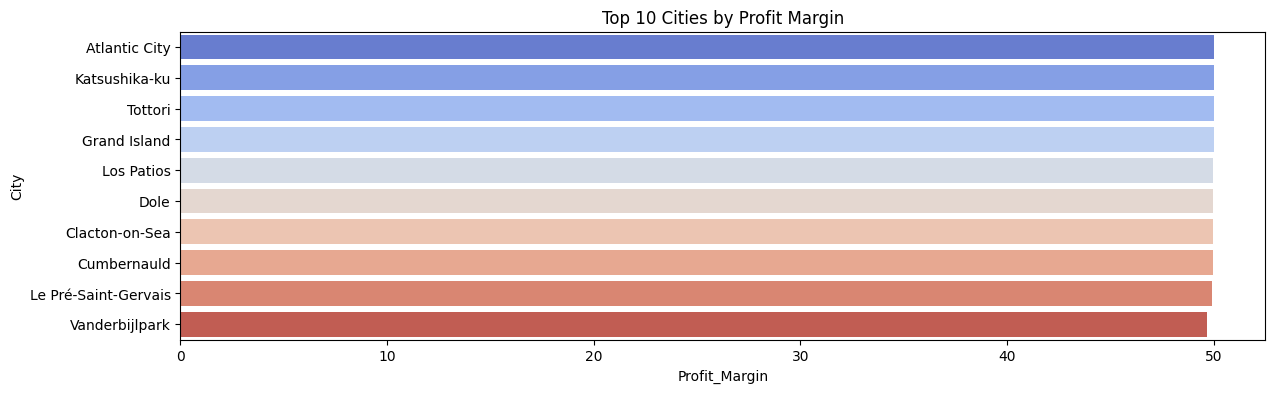

<ipython-input-47-4d2cbfbdebe9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit_Margin', y='City', data=city_profit_margin.tail(10), palette='coolwarm')


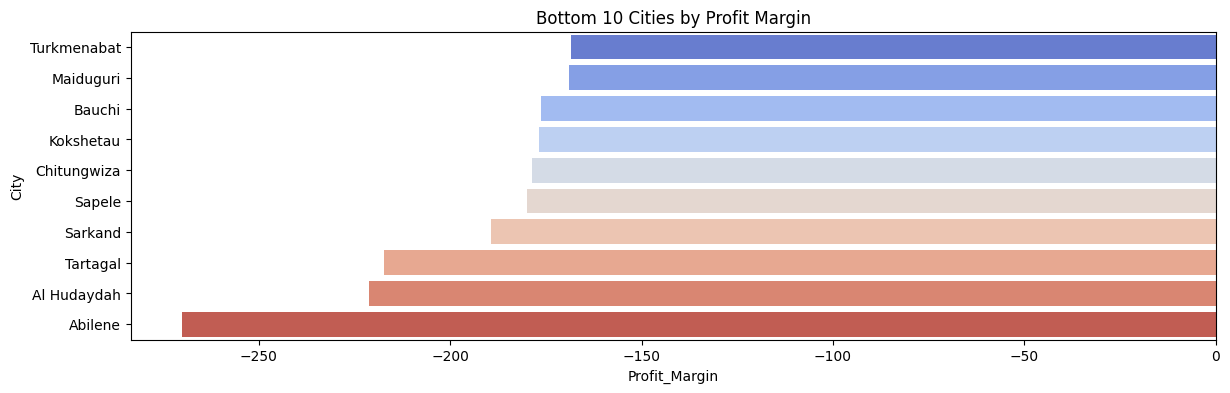

<ipython-input-47-4d2cbfbdebe9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit Margin', y='Region', data=profit_margin_region, palette='viridis')


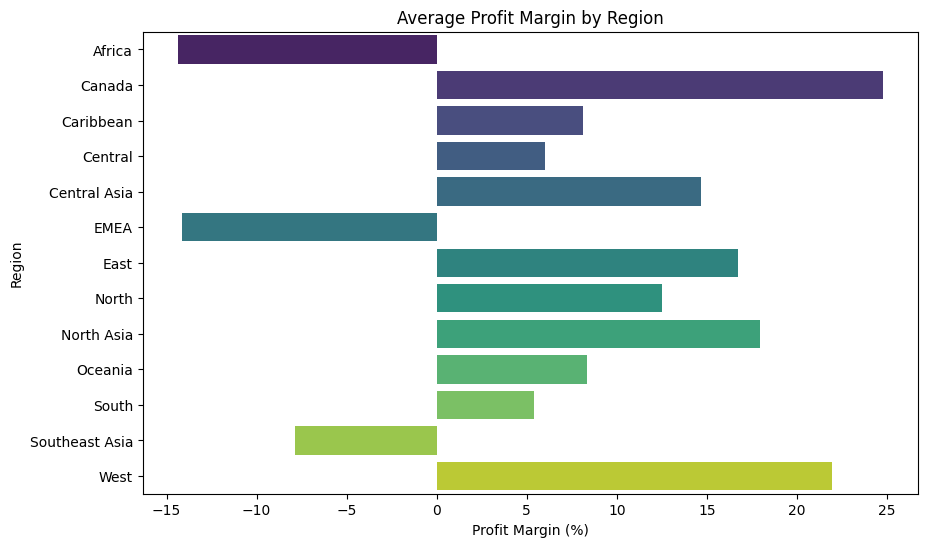

In [47]:
#Profit Margin based on city and region

# Profit margin for each city
data['Profit_Margin'] = (data['Profit'] / data['Sales']) * 100

city_profit_margin = data.groupby('City')['Profit_Margin'].mean().reset_index().sort_values(by='Profit_Margin', ascending=False)

# Visualize the cities with the highest and lowest profit margins
plt.figure(figsize=(14, 4))
sns.barplot(x='Profit_Margin', y='City', data=city_profit_margin.head(10), palette='coolwarm')
plt.title('Top 10 Cities by Profit Margin')
plt.show()

plt.figure(figsize=(14, 4))
sns.barplot(x='Profit_Margin', y='City', data=city_profit_margin.tail(10), palette='coolwarm')
plt.title('Bottom 10 Cities by Profit Margin')
plt.show()

# Calculate profit margin by region
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
profit_margin_region = data.groupby('Region')['Profit Margin'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit Margin', y='Region', data=profit_margin_region, palette='viridis')
plt.title('Average Profit Margin by Region')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Region')
plt.show()

<Figure size 2500x700 with 0 Axes>

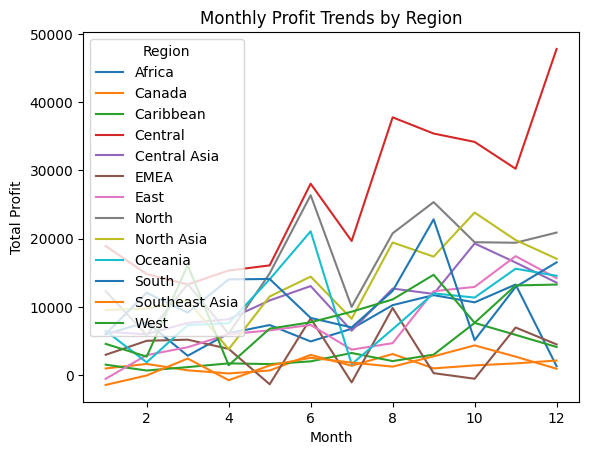

In [48]:
#Profitability Over Time by Region

monthly_profit = data.groupby(['month', 'Region'])['Profit'].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(25, 7))
monthly_profit.plot(kind='line')
plt.title('Monthly Profit Trends by Region')
plt.ylabel('Total Profit')
plt.xlabel('Month')
plt.show()

In [121]:
monthly_profit['Total Profit'] = monthly_profit.sum(axis=1)

# Sort the DataFrame by 'Total Profit' in descending order
monthly_profit_sorted = monthly_profit.sort_values(by='Total Profit', ascending=False)

# Display the top 4 rows
monthly_profit_sorted.head(4)

Region,Africa,Canada,Caribbean,Central,Central Asia,EMEA,East,North,North Asia,Oceania,South,Southeast Asia,West,Total Profit
month,,,,,,,,,,,,,,
11,13264.308,1708.38,5886.96160,30230.84222,16488.618,6964.578,17418.7080,19388.40940,19785.162,15580.851,12906.44370,2696.0028,13130.2194,175449.48412
12,1298.031,2129.67,4110.05840,47790.66890,13540.818,4488.054,14199.1732,20877.67224,17044.077,14543.952,16514.10986,923.2207,13258.6218,170718.12710
9,11708.736,974.67,2992.59392,35391.60816,11886.792,277.080,12285.8723,25340.84964,17356.335,11965.644,22819.39054,2743.7517,14694.8599,170438.18316
10,10651.479,1413.84,7638.03504,34165.34442,19281.961,-540.495,12917.4296,19463.83716,23811.168,11353.464,5113.08956,4345.1877,7655.0179,157269.35838


Shipping Cost Analysis:

In [51]:
import pandas as pd

# Calculate total and average shipping cost by city
city_shipping = data.groupby('City')['Shipping Cost'].agg(['sum', 'mean']).reset_index()
city_shipping.columns = ['City', 'Total Shipping Cost', 'Average Shipping Cost']

# Get top and bottom cities by total shipping cost
top_city_total = city_shipping.loc[city_shipping['Total Shipping Cost'].idxmax()]
bottom_city_total = city_shipping.loc[city_shipping['Total Shipping Cost'].idxmin()]

# Get top and bottom cities by average shipping cost
top_city_avg = city_shipping.loc[city_shipping['Average Shipping Cost'].idxmax()]
bottom_city_avg = city_shipping.loc[city_shipping['Average Shipping Cost'].idxmin()]

# Calculate average shipping cost across all cities
average_city_shipping_cost = city_shipping['Average Shipping Cost'].mean()

# Create a concise summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['Top City by Total Shipping Cost', 'Bottom City by Total Shipping Cost',
               'Top City by Average Shipping Cost', 'Bottom City by Average Shipping Cost',
               'Average Shipping Cost Across All Cities'],
    'City': [top_city_total['City'], bottom_city_total['City'],
             top_city_avg['City'], bottom_city_avg['City'], 'N/A'],
    'Total Shipping Cost': [top_city_total['Total Shipping Cost'],
                             bottom_city_total['Total Shipping Cost'],
                             'N/A', 'N/A', 'N/A'],
    'Average Shipping Cost': ['N/A', 'N/A', top_city_avg['Average Shipping Cost'],
                               bottom_city_avg['Average Shipping Cost'], average_city_shipping_cost]
})

# Display the summary DataFrame
print(summary_df)


                                    Metric            City  \
0          Top City by Total Shipping Cost   New York City   
1       Bottom City by Total Shipping Cost  Victoria Falls   
2        Top City by Average Shipping Cost          Kamina   
3     Bottom City by Average Shipping Cost  Victoria Falls   
4  Average Shipping Cost Across All Cities             N/A   

  Total Shipping Cost Average Shipping Cost  
0            26948.17                   N/A  
1                0.09                   N/A  
2                 N/A                678.15  
3                 N/A                  0.09  
4                 N/A             27.656888  


In [52]:
# Calculate total and average shipping cost by region
region_shipping = data.groupby('Region')['Shipping Cost'].agg(['sum', 'mean']).reset_index()
region_shipping.columns = ['Region', 'Total Shipping Cost', 'Average Shipping Cost']

# Get top and bottom regions by total shipping cost
top_region_total = region_shipping.loc[region_shipping['Total Shipping Cost'].idxmax()]
bottom_region_total = region_shipping.loc[region_shipping['Total Shipping Cost'].idxmin()]

# Get top and bottom regions by average shipping cost
top_region_avg = region_shipping.loc[region_shipping['Average Shipping Cost'].idxmax()]
bottom_region_avg = region_shipping.loc[region_shipping['Average Shipping Cost'].idxmin()]

# Calculate average shipping cost across all regions
average_region_shipping_cost = region_shipping['Average Shipping Cost'].mean()

# Create a concise summary DataFrame
summary_region_df = pd.DataFrame({
    'Metric': [
        'Top Region by Total Shipping Cost',
        'Bottom Region by Total Shipping Cost',
        'Top Region by Average Shipping Cost',
        'Bottom Region by Average Shipping Cost',
        'Average Shipping Cost Across All Regions'
    ],
    'Region': [
        top_region_total['Region'],
        bottom_region_total['Region'],
        top_region_avg['Region'],
        bottom_region_avg['Region'],
        'N/A'
    ],
    'Total Shipping Cost': [
        top_region_total['Total Shipping Cost'],
        bottom_region_total['Total Shipping Cost'],
        'N/A',
        'N/A',
        'N/A'
    ],
    'Average Shipping Cost': [
        'N/A',
        'N/A',
        top_region_avg['Average Shipping Cost'],
        bottom_region_avg['Average Shipping Cost'],
        average_region_shipping_cost
    ]
})

# Display the summary DataFrame
print(summary_region_df)

                                     Metric      Region Total Shipping Cost  \
0         Top Region by Total Shipping Cost     Central           296940.56   
1      Bottom Region by Total Shipping Cost      Canada             7405.63   
2       Top Region by Average Shipping Cost  North Asia                 N/A   
3    Bottom Region by Average Shipping Cost        EMEA                 N/A   
4  Average Shipping Cost Across All Regions         N/A                 N/A   

  Average Shipping Cost  
0                   N/A  
1                   N/A  
2             40.646112  
3             17.573221  
4              26.86799  


<ipython-input-53-c6c367a5e677>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Shipping Cost', y='Region', data=region_shipping, palette='viridis')


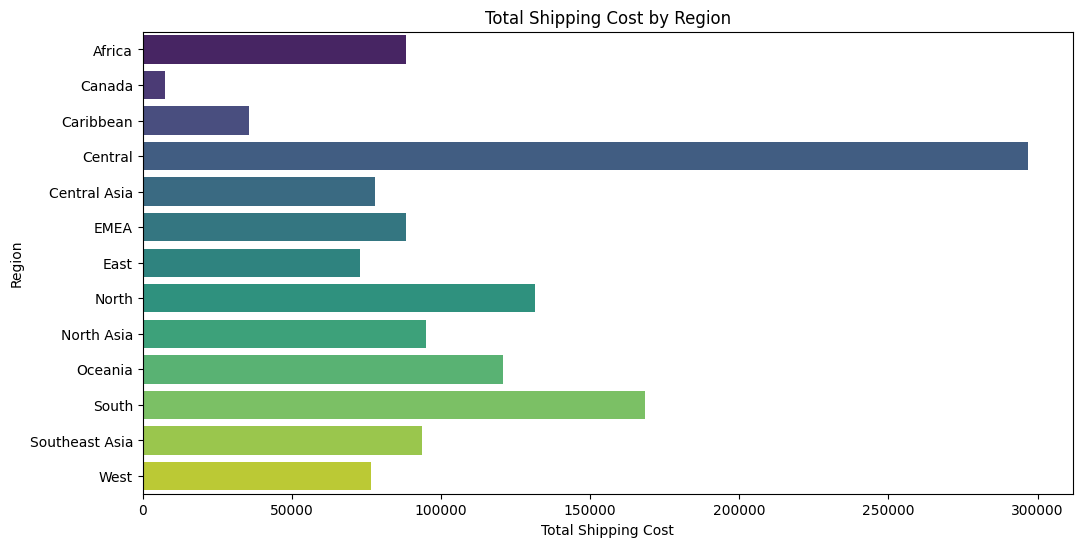

<ipython-input-53-c6c367a5e677>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Shipping Cost', y='Region', data=region_shipping, palette='viridis')


Text(0.5, 1.0, 'Average Shipping Cost by Region')

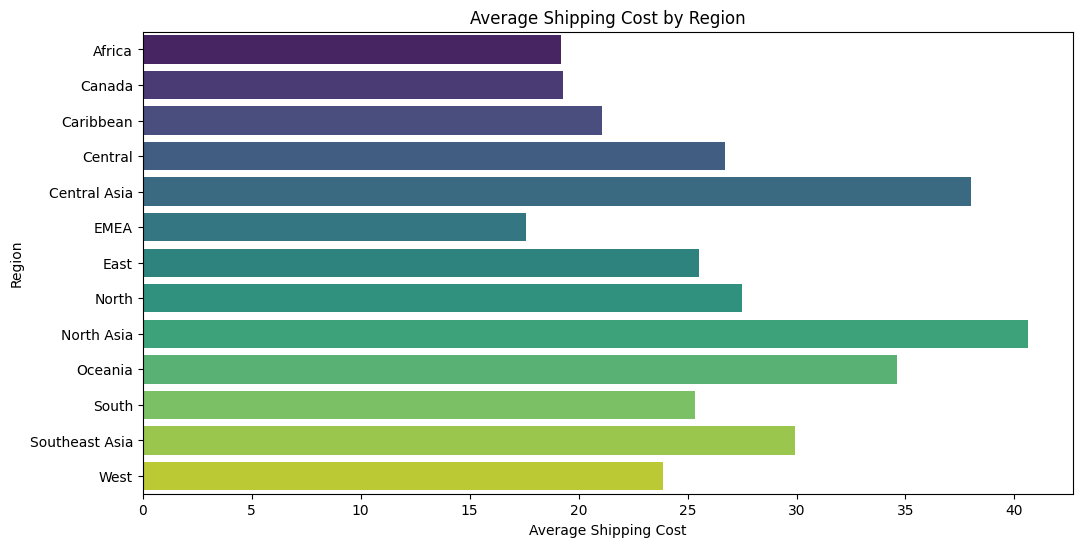

In [53]:
# Calculate total and average shipping cost by region
region_shipping = data.groupby('Region')['Shipping Cost'].agg(['sum', 'mean']).reset_index()
region_shipping.columns = ['Region', 'Total Shipping Cost', 'Average Shipping Cost']

# Plot total shipping cost by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Shipping Cost', y='Region', data=region_shipping, palette='viridis')
plt.title('Total Shipping Cost by Region')
plt.xlabel('Total Shipping Cost')
plt.ylabel('Region')
plt.show()

# Plot average shipping cost by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Shipping Cost', y='Region', data=region_shipping, palette='viridis')
plt.title('Average Shipping Cost by Region')

Customer Density & Market Penetration Analysis

<ipython-input-54-d8d65a2a802c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Customers', y='Region', data=region_customer_density, palette='coolwarm')


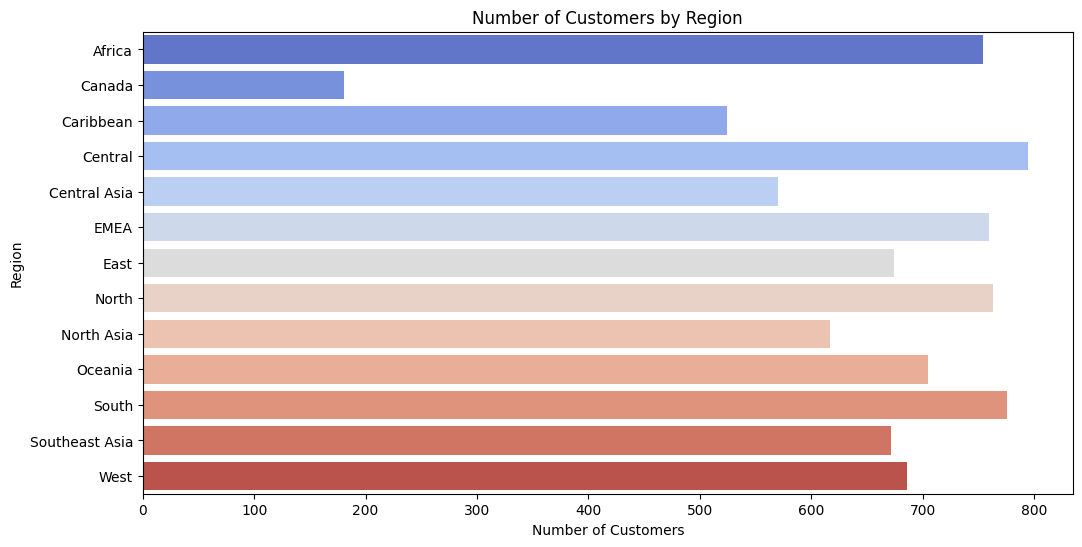

In [54]:
# Number of customers by City
city_customer_density = data.groupby('City')['Customer ID'].nunique().reset_index()
city_customer_density.columns = ['City', 'Number of Customers']

# Number of customers by State
state_customer_density = data.groupby('State')['Customer ID'].nunique().reset_index()
state_customer_density.columns = ['State', 'Number of Customers']

# Number of customers by Country
country_customer_density = data.groupby('Country')['Customer ID'].nunique().reset_index()
country_customer_density.columns = ['Country', 'Number of Customers']

# Number of customers by Region
region_customer_density = data.groupby('Region')['Customer ID'].nunique().reset_index()
region_customer_density.columns = ['Region', 'Number of Customers']

# Plot number of customers by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Customers', y='Region', data=region_customer_density, palette='coolwarm')
plt.title('Number of Customers by Region')
plt.xlabel('Number of Customers')
plt.ylabel('Region')
plt.show()

In [122]:
city_customer_density

,City,Number of Customers
0,Aachen,10
1,Aalen,1
2,Aalst,1
3,Aba,9
4,Abadan,6
...,...,...
3631,Zwedru,1
3632,Zwickau,3
3633,Zwolle,2
3634,eMbalenhle,1


Product Category Analysis by Region

<Figure size 1400x700 with 0 Axes>

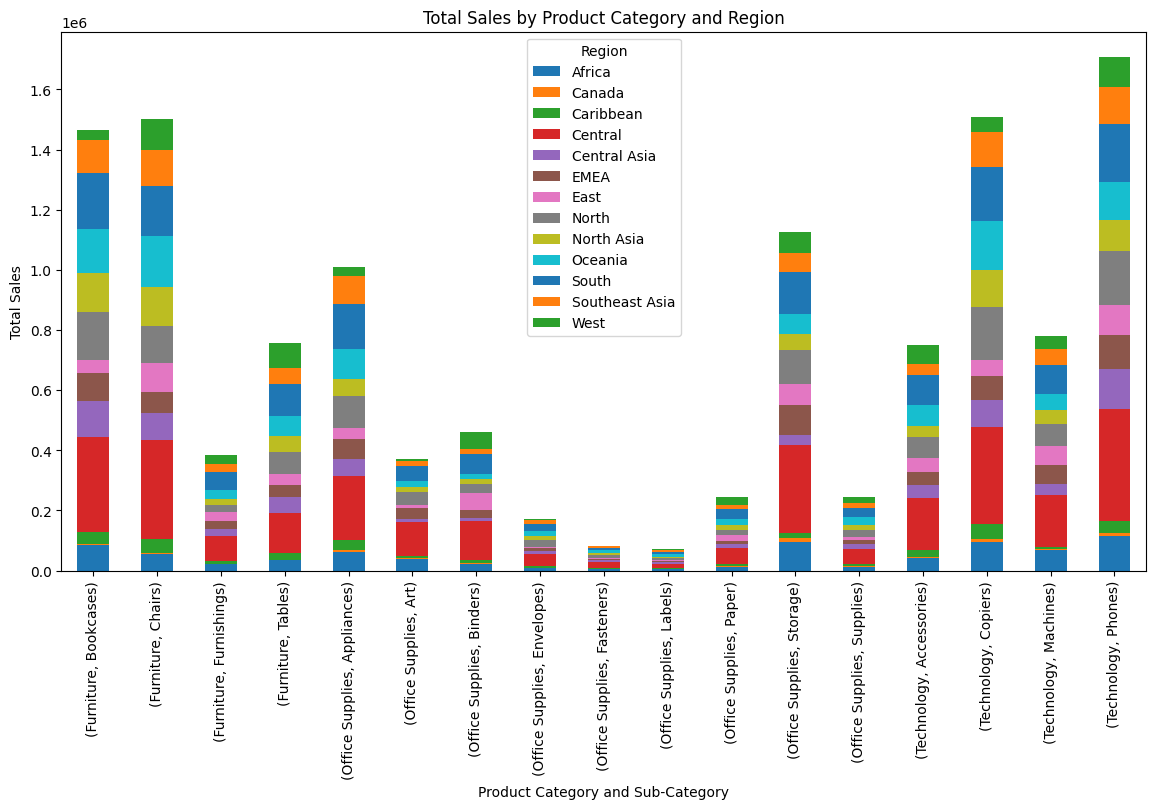

<Figure size 1400x700 with 0 Axes>

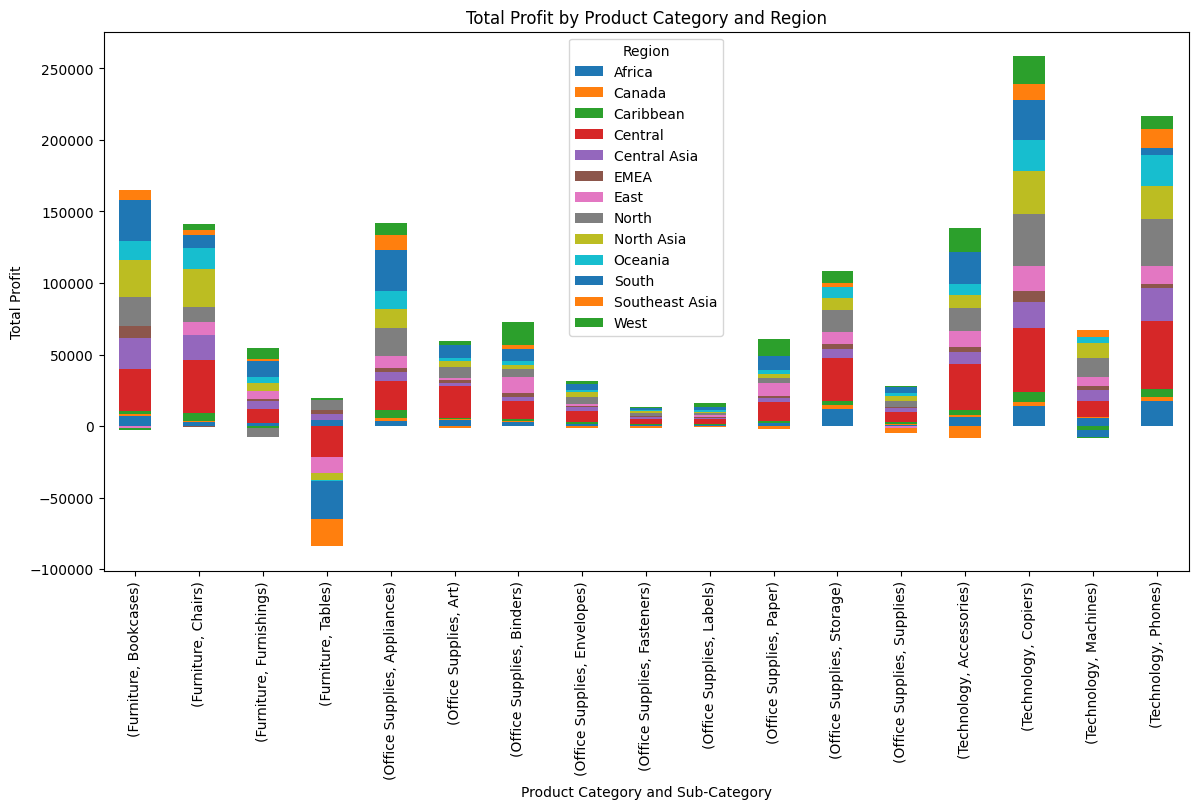

In [55]:
# Group by Category, Sub-Category, and Region
category_region_sales = data.groupby(['Category', 'Sub-Category', 'Region'])['Sales'].sum().reset_index()
category_region_profit = data.groupby(['Category', 'Sub-Category', 'Region'])['Profit'].sum().reset_index()

# Pivot tables for easier plotting
sales_pivot = category_region_sales.pivot_table(index=['Category', 'Sub-Category'], columns='Region', values='Sales', fill_value=0)
profit_pivot = category_region_profit.pivot_table(index=['Category', 'Sub-Category'], columns='Region', values='Profit', fill_value=0)

# Plotting Sales by Region
plt.figure(figsize=(14, 7))
sales_pivot.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Sales by Product Category and Region')
plt.xlabel('Product Category and Sub-Category')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.show()

# Plotting Profit by Region
plt.figure(figsize=(14, 7))
profit_pivot.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Profit by Product Category and Region')
plt.xlabel('Product Category and Sub-Category')
plt.ylabel('Total Profit')
plt.legend(title='Region')
plt.show()

In [126]:
sales_percentage = category_region_sales.copy()
sales_percentage = sales_percentage.sort_values(by='Sales', ascending = False)
sales_percentage

,Category,Sub-Category,Region,Sales
211,Technology,Phones,Central,370198.04400
16,Furniture,Chairs,Central,328571.43700
185,Technology,Copiers,Central,322961.87864
3,Furniture,Bookcases,Central,315419.41480
146,Office Supplies,Storage,Central,292402.30900
...,...,...,...,...
110,Office Supplies,Fasteners,East,819.71800
27,Furniture,Furnishings,Canada,808.53000
92,Office Supplies,Envelopes,Canada,567.18000
105,Office Supplies,Fasteners,Canada,479.46000


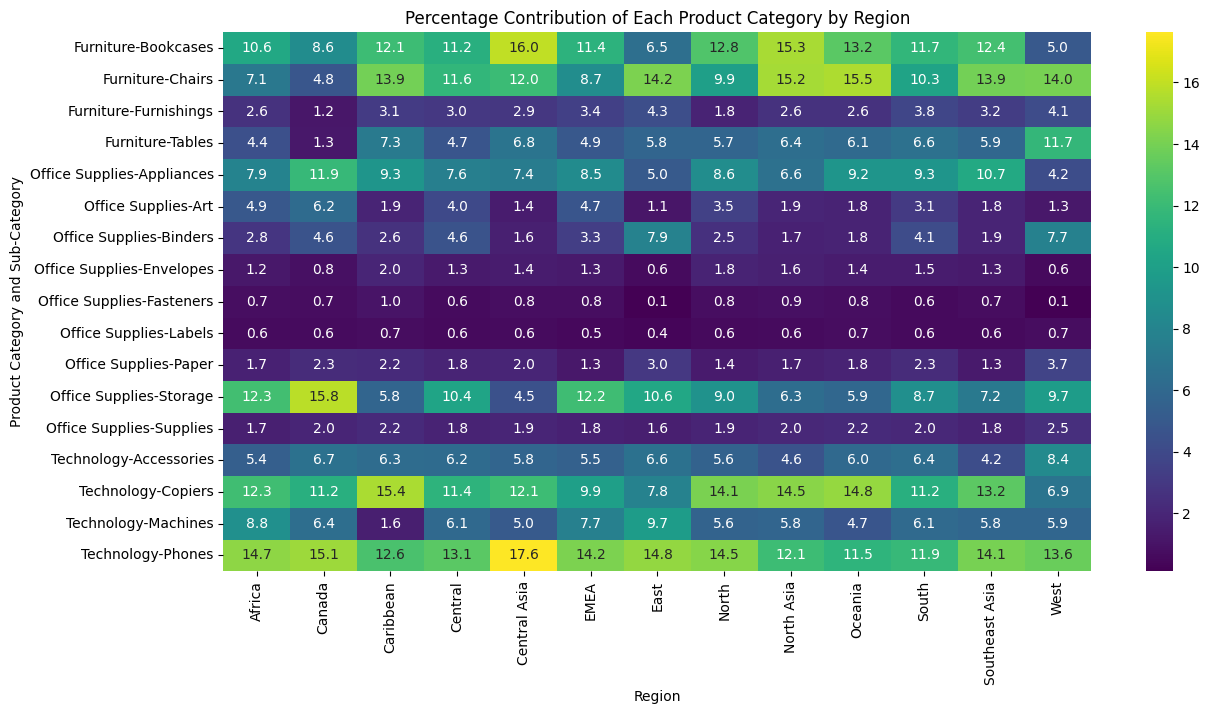

In [57]:
#Calculate percentage contribution based on region and sales
total_sales_by_region = sales_percentage.groupby('Region')['Sales'].sum().reset_index()
total_sales_by_region.columns = ['Region', 'Total Sales']

# Merge total sales back into the main DataFrame
sales_percentage = sales_percentage.merge(total_sales_by_region, on='Region')

# Calculate percentage contribution
sales_percentage['Percentage'] = (sales_percentage['Sales'] / sales_percentage['Total Sales']) * 100
sales_percentage_pivot = sales_percentage.pivot_table(index=['Category', 'Sub-Category'], columns='Region', values='Percentage', fill_value=0)

# Plotting Percentage Contribution
plt.figure(figsize=(14, 7))
sns.heatmap(sales_percentage_pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title('Percentage Contribution of Each Product Category by Region')
plt.xlabel('Region')
plt.ylabel('Product Category and Sub-Category')
plt.show()

<Figure size 1400x700 with 0 Axes>

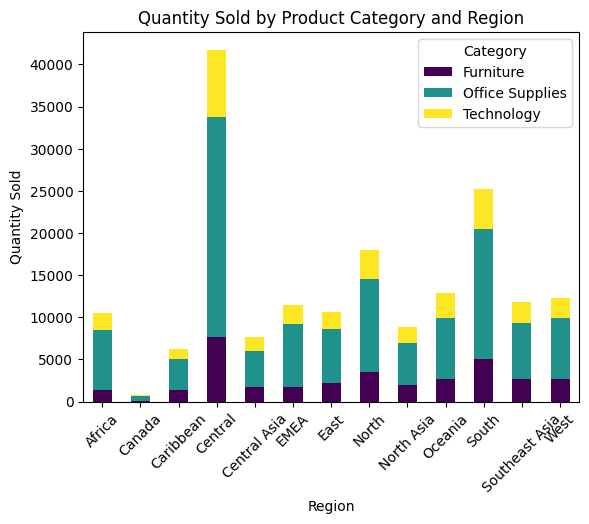

In [58]:
#Quantity Sold by Product Category and Region
quantity_sold_by_region = data.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()
quantity_sold_by_region = quantity_sold_by_region.pivot(index='Region', columns='Category', values='Quantity')

# Plot Quantity Sold by Product Category and Region
plt.figure(figsize=(14, 7))
quantity_sold_by_region.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Quantity Sold by Product Category and Region')
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

Text(0.5, 1.0, 'Total Profit by Category and Region')

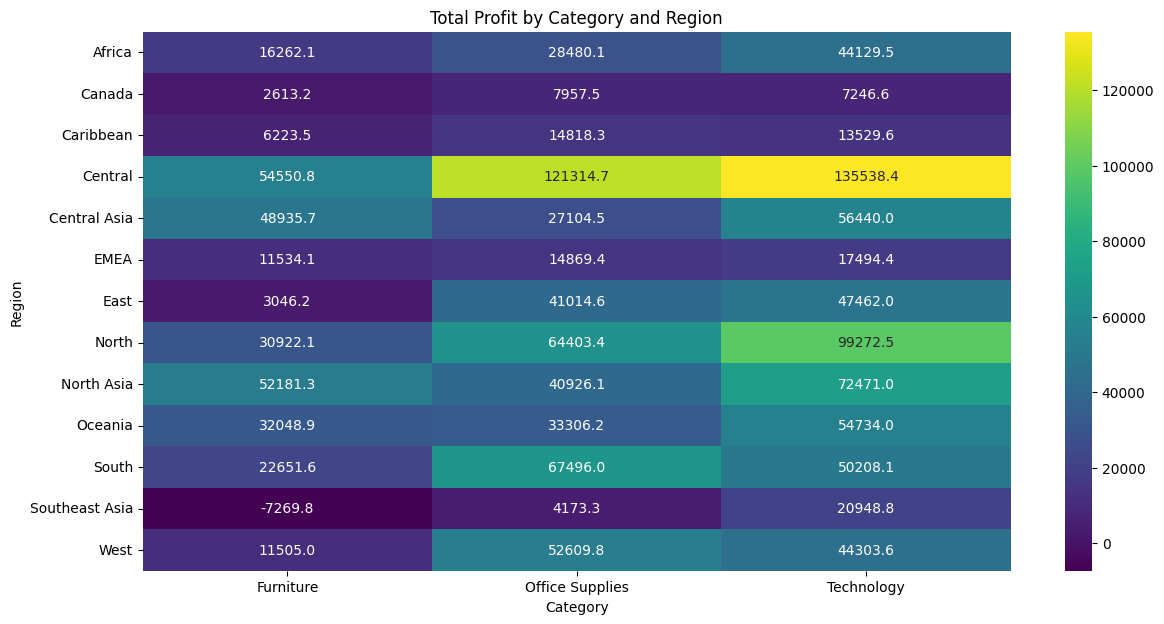

In [59]:
#Total Profit by Category and Region
profit_by_cat_reg = data.groupby(['Category','Region'])['Profit'].sum().reset_index()
profit_by_cat_reg.columns = ['Category', 'Region', 'Total Profit']

# Pivot table for easier plotting
profit_by_cat_reg_pivot = profit_by_cat_reg.pivot(index = 'Region', columns = 'Category', values = 'Total Profit')

#Plotting
plt.figure(figsize=(14, 7))
sns.heatmap(profit_by_cat_reg_pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title('Total Profit by Category and Region')

Segment Analysis by Geography Analysis

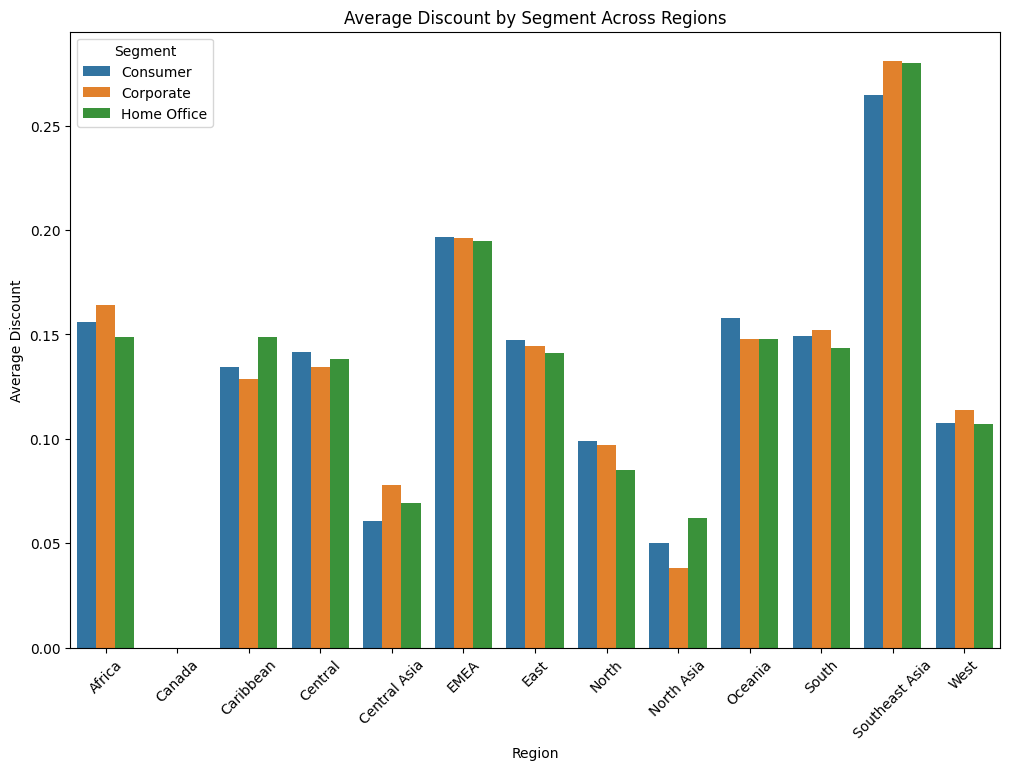

In [60]:
#Average Discount Given by Segment Across Regions:

avg_discount_by_segment_region = data.groupby(['Segment', 'Region'])['Discount'].mean().reset_index()
avg_discount_by_segment_region.columns = ['Segment', 'Region', 'Average Discount']

# Plotting the average discount by segment and region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Average Discount', hue='Segment', data=avg_discount_by_segment_region)
plt.title('Average Discount by Segment Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Discount')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.show()

In [127]:
avg_discount_by_segment_region

,Segment,Region,Average Discount
0,Consumer,Africa,0.155733
1,Consumer,Canada,0.000000
2,Consumer,Caribbean,0.134435
3,Consumer,Central,0.141548
4,Consumer,Central Asia,0.060749
5,Consumer,EMEA,0.196690
6,Consumer,East,0.147447
7,Consumer,North,0.099059
8,Consumer,North Asia,0.050000
9,Consumer,Oceania,0.157975


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


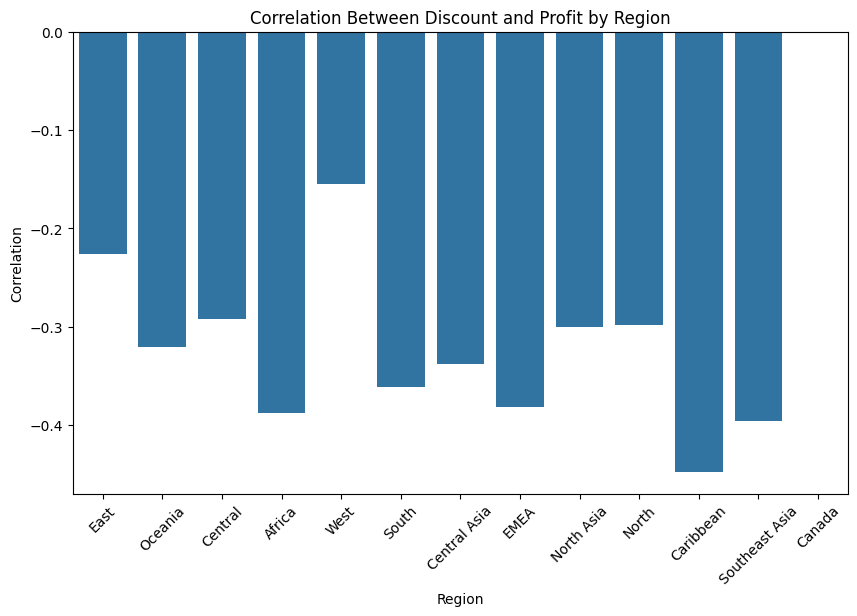

In [61]:
# Create an empty dictionary to store the correlations
correlation_by_region = {}

# Loop through each region and calculate the correlation
for region in data['Region'].unique():
    # Filter the data for the current region
    region_data = data[data['Region'] == region]

    # Calculate the correlation between Discount and Profit
    correlation = region_data['Discount'].corr(region_data['Profit'])

    # Store the result in the dictionary
    correlation_by_region[region] = correlation

# Convert the dictionary to a DataFrame
correlation_by_region_df = pd.DataFrame(list(correlation_by_region.items()), columns=['Region', 'Discount-Profit Correlation'])
correlation_by_region_df
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Discount-Profit Correlation', data=correlation_by_region_df)
plt.title('Correlation Between Discount and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [62]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,month,Profit Margin,Profit_Margin
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7,33.000000,33.000000
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2,-7.784693,-7.784693
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,10,17.776630,17.776630


Inventory and Supply Chain Analysis:



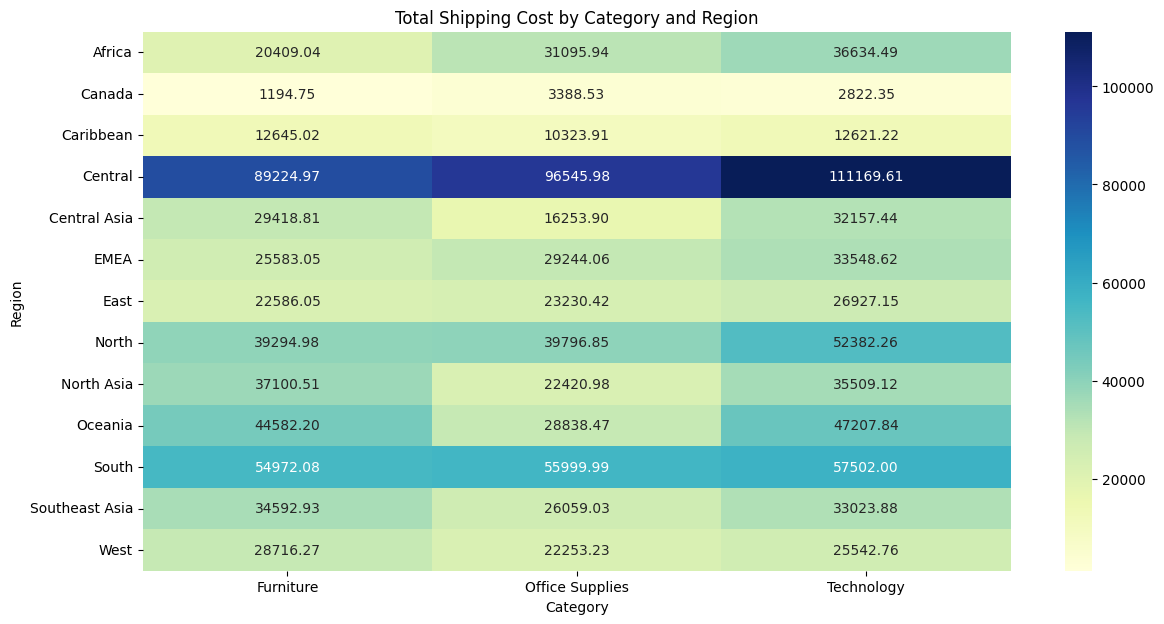

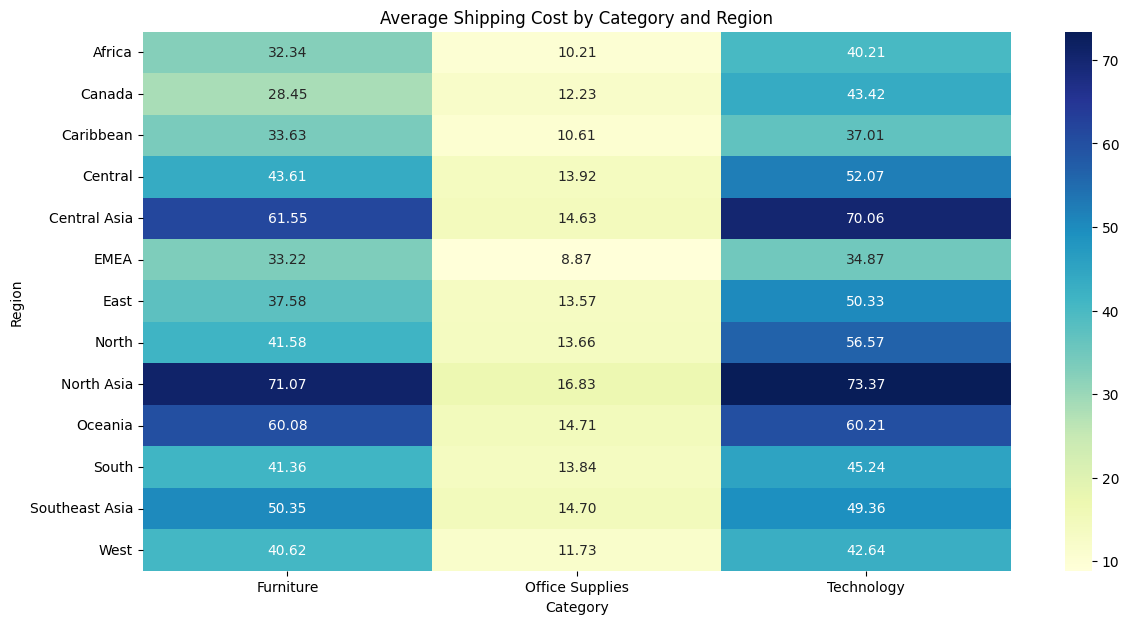

In [63]:
#Examine the relationship between sales and shipping costs across regions.
# Total and Average Shipping Cost by Category and Region
shipping_by_cat_reg = data.groupby(['Category', 'Region'])['Shipping Cost'].agg(['sum', 'mean']).reset_index()
shipping_by_cat_reg.columns = ['Category', 'Region', 'Total Shipping Cost', 'Average Shipping Cost']

# Pivot tables for visualization
total_shipping_pivot = shipping_by_cat_reg.pivot(index='Region', columns='Category', values='Total Shipping Cost')
average_shipping_pivot = shipping_by_cat_reg.pivot(index='Region', columns='Category', values='Average Shipping Cost')

# Plot Total Shipping Costs
plt.figure(figsize=(14, 7))
sns.heatmap(total_shipping_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Total Shipping Cost by Category and Region')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

# Plot Average Shipping Costs
plt.figure(figsize=(14, 7))
sns.heatmap(average_shipping_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Shipping Cost by Category and Region')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

In [128]:
shipping_by_cat_reg

,Category,Region,Total Shipping Cost,Average Shipping Cost
0,Furniture,Africa,20409.04,32.343962
1,Furniture,Canada,1194.75,28.446429
2,Furniture,Caribbean,12645.02,33.630372
3,Furniture,Central,89224.97,43.609467
4,Furniture,Central Asia,29418.81,61.545628
5,Furniture,EMEA,25583.05,33.224740
6,Furniture,East,22586.05,37.580782
7,Furniture,North,39294.98,41.581989
8,Furniture,North Asia,37100.51,71.073774
9,Furniture,Oceania,44582.20,60.083827


In [64]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,month,Profit Margin,Profit_Margin
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7,33.000000,33.000000
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2,-7.784693,-7.784693


In [65]:
data['year'] = pd.to_datetime(data['Order Date']).dt.year
data['month'] = pd.to_datetime(data['Order Date']).dt.month
data['day'] = pd.to_datetime(data['Order Date']).dt.day

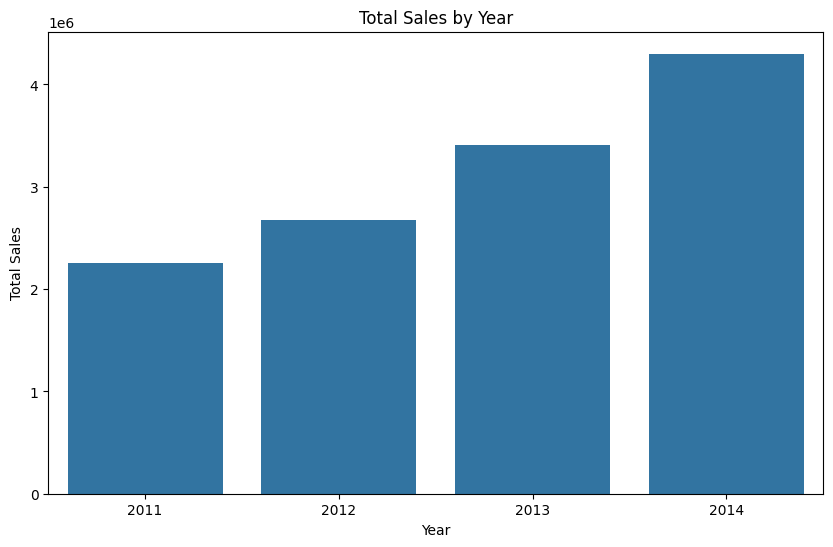

In [66]:
sales_year = data.groupby('year')['Sales'].sum().reset_index(name= 'Total Sales')
sales_year['YoY Growth (%)'] = sales_year['Total Sales'].pct_change() * 100

sales_year.columns = ['year','Total Sales','Y-o-Y']
sales_year

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='Total Sales', data=sales_year)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [67]:
sales_year

,year,Total Sales,Y-o-Y
0,2011,2.259451e+06,NaN
1,2012,2.677439e+06,18.499530
2,2013,3.405746e+06,27.201659
3,2014,4.299866e+06,26.253259


#analyze the time gaps between order dates and shipping dates


In [68]:
data['Time Gap (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
time_gap_by_ship_mode = data.groupby('Ship Mode')['Time Gap (Days)'].agg(['max', 'mean', 'min']).reset_index()

# Rename columns for clarity
time_gap_by_ship_mode.columns = ['Ship Mode', 'Max Time Gap (day)', 'Average Time Gap (day)', 'Min Time Gap (day)']

# Export results to CSV
time_gap_by_ship_mode.to_csv('time_gap_by_ship_mode.csv', index=False)

print("Time gap analysis results have been saved to 'time_gap_by_ship_mode.csv'.")

Time gap analysis results have been saved to 'time_gap_by_ship_mode.csv'.


In [69]:
pd.read_csv('time_gap_by_ship_mode.csv')

,Ship Mode,Max Time Gap (day),Average Time Gap (day),Min Time Gap (day)
0,First Class,3,2.181746,1
1,Same Day,1,0.037394,0
2,Second Class,5,3.230187,2
3,Standard Class,7,4.998018,4


EDA ANALYSIS

In [70]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           51290 non-null  int64         
 1   Order ID         51290 non-null  object        
 2   Order Date       51290 non-null  datetime64[ns]
 3   Ship Date        51290 non-null  datetime64[ns]
 4   Ship Mode        51290 non-null  object        
 5   Customer ID      51290 non-null  object        
 6   Customer Name    51290 non-null  object        
 7   Segment          51290 non-null  object        
 8   City             51290 non-null  object        
 9   State            51290 non-null  object        
 10  Country          51290 non-null  object        
 11  Postal Code      51290 non-null  object        
 12  Market           51290 non-null  object        
 13  Region           51290 non-null  object        
 14  Product ID       51290 non-null  objec

In [72]:
#T-Test: Compare numerical variables (like Sales, Profit) across two groups (e.g., Ship Mode, Segment).
from scipy.stats import ttest_ind

# Group data by Ship Mode
standard_class_sales = data[data['Ship Mode'] == 'Standard Class']['Sales']
first_class_sales = data[data['Ship Mode'] == 'First Class']['Sales']

# Perform the t-test
t_stat, p_val = ttest_ind(standard_class_sales, first_class_sales, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in average sales between Standard Class and First Class.")
else:
    print("No significant difference in average sales between Standard Class and First Class.")

T-statistic: 0.36742177515410834
P-value: 0.7133111336352411
No significant difference in average sales between Standard Class and First Class.


In [73]:
#Chi-Square Test: Check if there's an association between two categorical variables (e.g., Segment and Ship Mode).
from scipy.stats import chi2_contingency

# Create a contingency table for Segment and Ship Mode
contingency_table = pd.crosstab(data['Segment'], data['Ship Mode'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant association between Segment and Ship Mode.")
else:
    print("Segment and Ship Mode are independent.")

Chi-Square Statistic: 18.274424263215177
P-value: 0.005581770901920851
There is a significant association between Segment and Ship Mode.


In [74]:
contingency_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,3918,1467,5257,15876
Corporate,2245,728,3198,9258
Home Office,1342,506,1854,5641


In [75]:
data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,month,Profit Margin,Profit_Margin,year,day,Time Gap (Days)
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,7,33.000000,33.000000,2012,31,0
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,2,-7.784693,-7.784693,2013,5,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,Medium,10,17.776630,17.776630,2013,17,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,Medium,1,-3.337586,-3.337586,2013,28,2


Pearson Correlation:
                   Sales    Profit  Quantity  Shipping Cost
Sales          1.000000  0.484918  0.313577       0.768073
Profit         0.484918  1.000000  0.104365       0.354441
Quantity       0.313577  0.104365  1.000000       0.272649
Shipping Cost  0.768073  0.354441  0.272649       1.000000
Spearman Correlation:
                   Sales    Profit  Quantity  Shipping Cost
Sales          1.000000  0.490195  0.416397       0.913261
Profit         0.490195  1.000000  0.201442       0.449408
Quantity       0.416397  0.201442  1.000000       0.378736
Shipping Cost  0.913261  0.449408  0.378736       1.000000


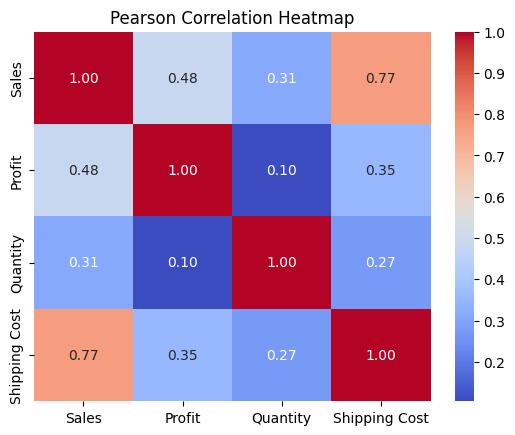

In [77]:
#Coreleation Analysis

# Pearson Correlation
pearson_corr = data[['Sales', 'Profit', 'Quantity', 'Shipping Cost']].corr(method='pearson')
print('Pearson Correlation:\n', pearson_corr)

# Spearman Correlation
spearman_corr = data[['Sales', 'Profit', 'Quantity', 'Shipping Cost']].corr(method='spearman')
print('Spearman Correlation:\n', spearman_corr)

# Heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

Annova Test

In [78]:
#For Annova testing columns choosen are profit and region
new_data = data[['Profit', 'Region']]
new_data


,Profit,Region
0,762.1845,East
1,-288.7650,Oceania
2,919.9710,Oceania
3,-96.5400,Central
4,311.5200,Africa
...,...,...
51285,4.5000,North Asia
51286,-1.1100,Central
51287,11.2308,West
51288,2.4000,South


In [80]:
data['Region'].nunique()

13

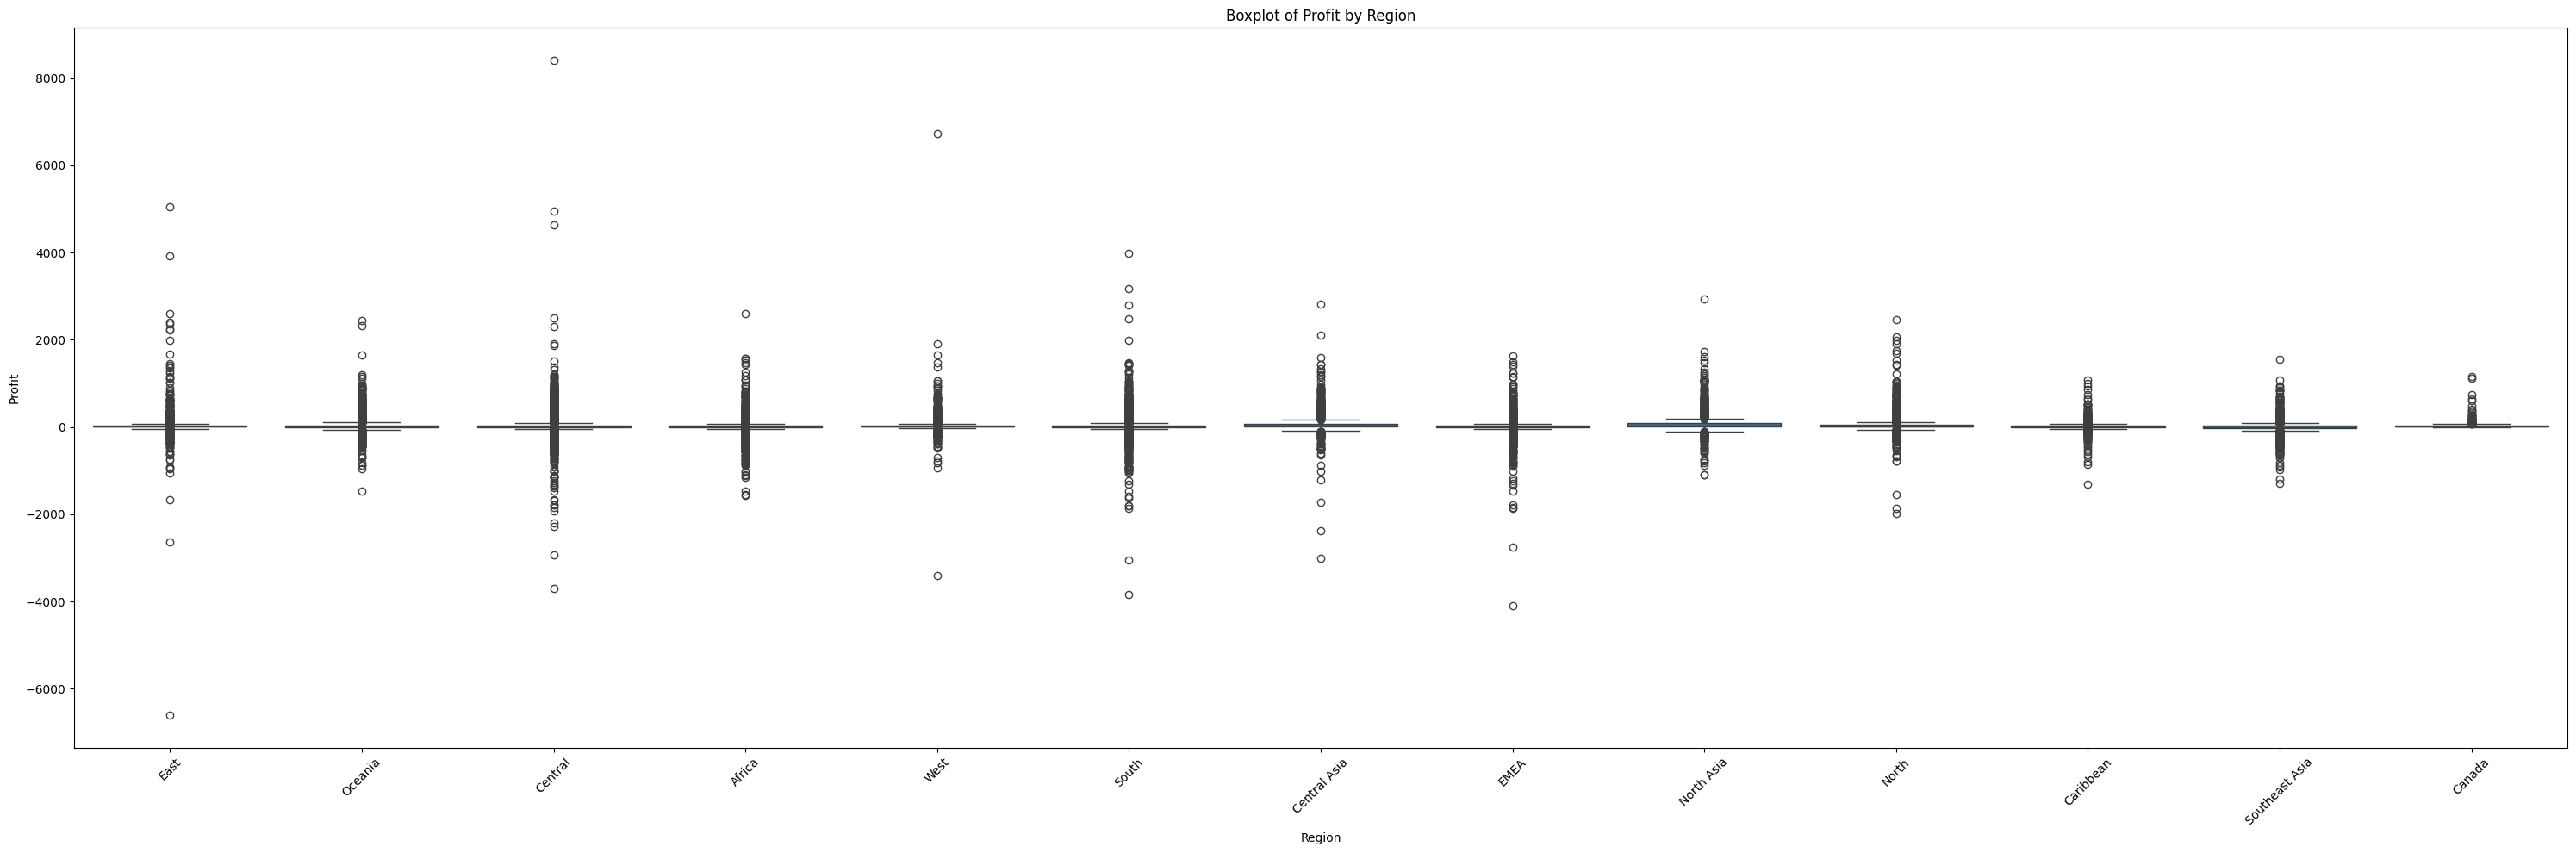

In [98]:
plt.figure(figsize=(30, 10))  # Adjust width and height for elongation
sns.boxplot(x='Region', y='Profit', data=new_data)

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Boxplot of Profit by Region')
plt.tight_layout()  # Adjusts layout to prevent clipping of labels
plt.show()

In [94]:
np.random.seed(0)  # For reproducibility
random_groups = np.random.choice([f'g{i+1}' for i in range(13)], size=len(data))
new_data['Random Region Group'] = random_groups


<ipython-input-94-d8e358ae4588>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Random Region Group'] = random_groups


In [95]:
new_data

,Profit,Region,Random Region Group
0,762.1845,East,g13
1,-288.7650,Oceania,g6
2,919.9710,Oceania,g1
3,-96.5400,Central,g4
4,311.5200,Africa,g12
...,...,...,...
51285,4.5000,North Asia,g6
51286,-1.1100,Central,g7
51287,11.2308,West,g7
51288,2.4000,South,g12


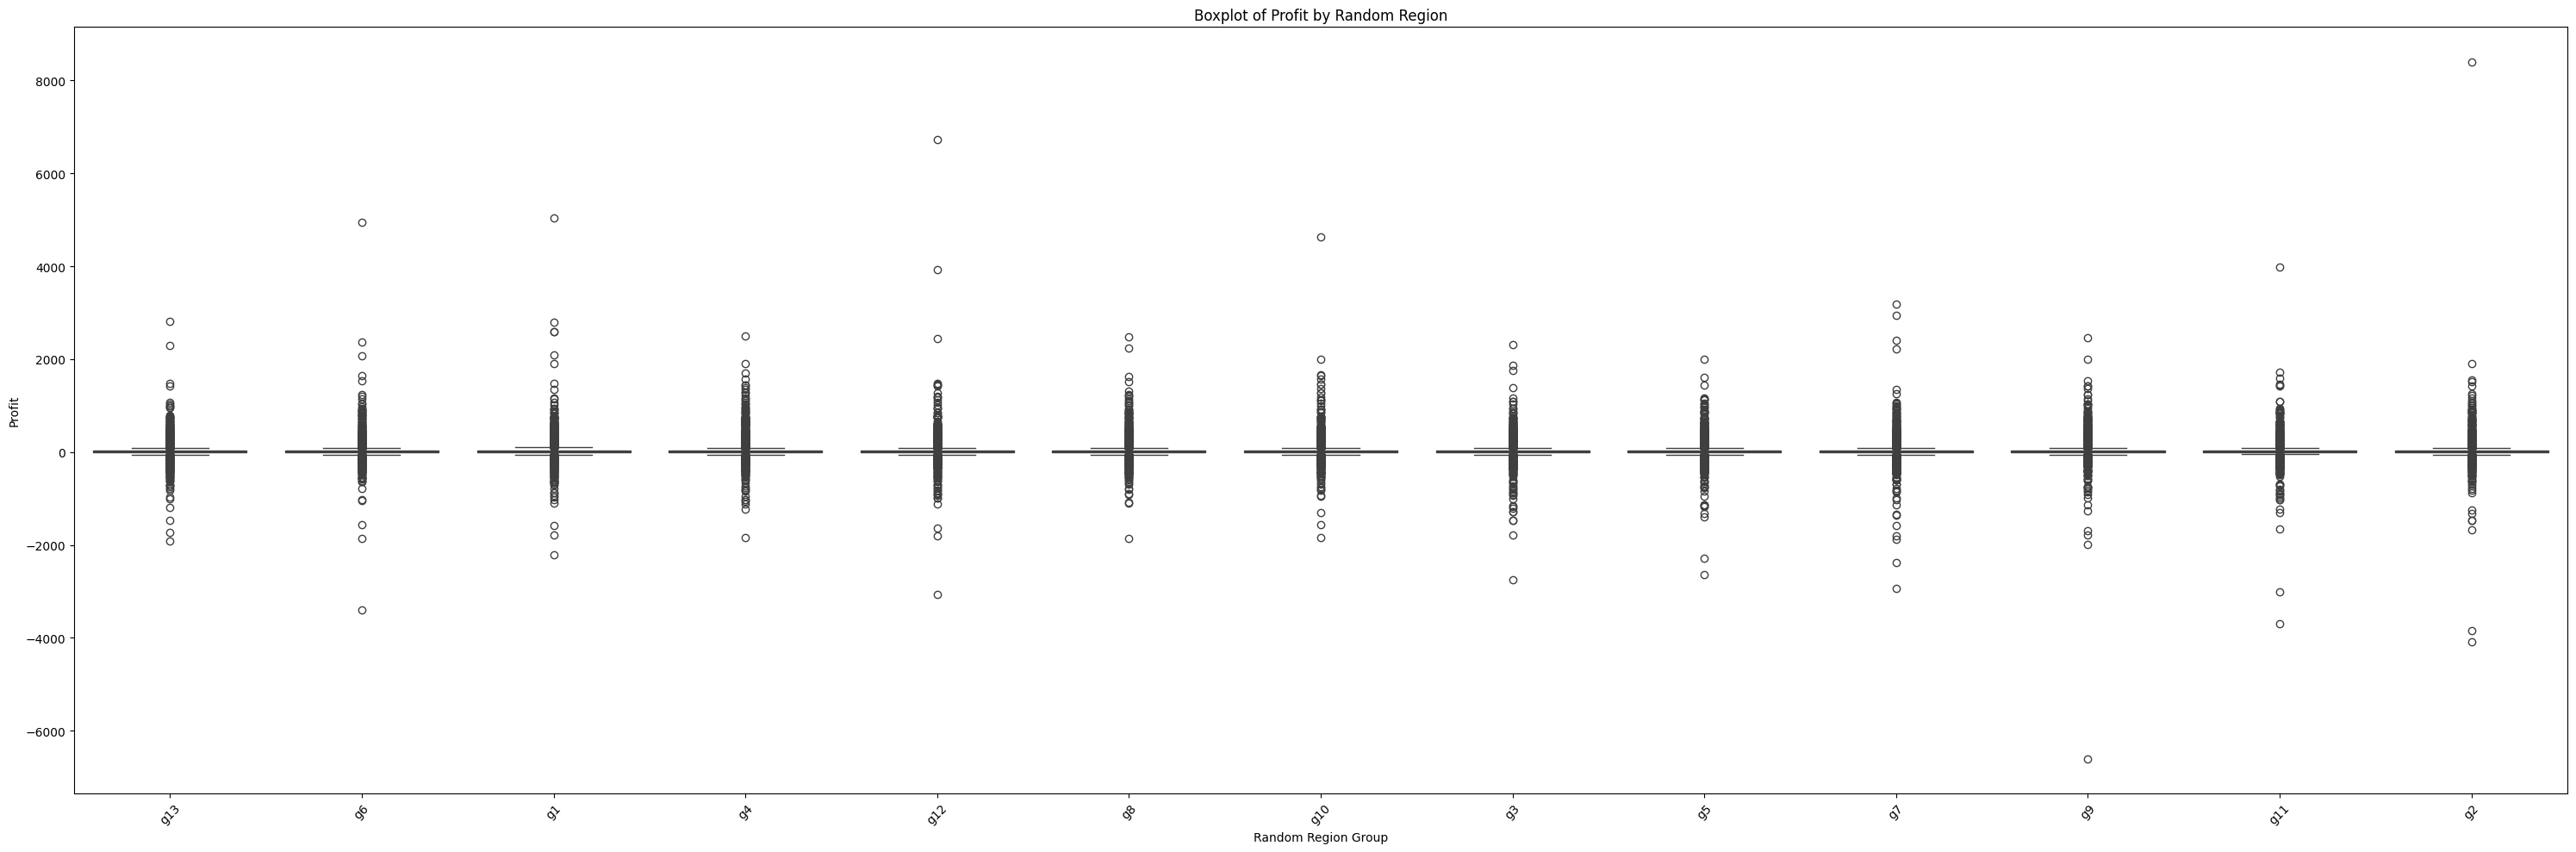

In [107]:
plt.figure(figsize=(30, 10))  # Adjust width and height for elongation
sns.boxplot(x='Random Region Group', y='Profit', data=new_data)

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Boxplot of Profit by Random Region')
plt.tight_layout()  # Adjusts layout to prevent clipping of labels
plt.show()

In [103]:
new_data['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [104]:
new_data['Random Region Group'].unique()

array(['g13', 'g6', 'g1', 'g4', 'g12', 'g8', 'g10', 'g3', 'g5', 'g7',
       'g9', 'g11', 'g2'], dtype=object)

In [105]:
# Define profit data for each region
profit_east = new_data[new_data['Region'] == 'East']['Profit']
profit_oceania = new_data[new_data['Region'] == 'Oceania']['Profit']
profit_central = new_data[new_data['Region'] == 'Central']['Profit']
profit_africa = new_data[new_data['Region'] == 'Africa']['Profit']
profit_west = new_data[new_data['Region'] == 'West']['Profit']
profit_south = new_data[new_data['Region'] == 'South']['Profit']
profit_central_asia = new_data[new_data['Region'] == 'Central Asia']['Profit']
profit_emea = new_data[new_data['Region'] == 'EMEA']['Profit']
profit_north_asia = new_data[new_data['Region'] == 'North Asia']['Profit']
profit_north = new_data[new_data['Region'] == 'North']['Profit']
profit_caribbean = new_data[new_data['Region'] == 'Caribbean']['Profit']
profit_southeast_asia = new_data[new_data['Region'] == 'Southeast Asia']['Profit']
profit_canada = new_data[new_data['Region'] == 'Canada']['Profit']

# Perform One-Way ANOVA for Profit vs Region
f_stats, p_value = f_oneway(
    profit_east, profit_oceania, profit_central, profit_africa, profit_west,
    profit_south, profit_central_asia, profit_emea, profit_north_asia, profit_north,
    profit_caribbean, profit_southeast_asia, profit_canada
)

print("One-Way ANOVA for Profit vs Region:")
print("Test statistic:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: At least one region has a different mean profit.")
else:
    print("Fail to reject H0: All regions have the same mean profit.")

One-Way ANOVA for Profit vs Region:
Test statistic: 34.26121568235655
P-value: 3.617471983600004e-80
Reject H0: At least one region has a different mean profit.


In [106]:
profit_g1 = new_data[new_data['Random Region Group'] == 'g1']['Profit']
profit_g2 = new_data[new_data['Random Region Group'] == 'g2']['Profit']
profit_g3 = new_data[new_data['Random Region Group'] == 'g3']['Profit']
profit_g4 = new_data[new_data['Random Region Group'] == 'g4']['Profit']
profit_g5 = new_data[new_data['Random Region Group'] == 'g5']['Profit']
profit_g6 = new_data[new_data['Random Region Group'] == 'g6']['Profit']
profit_g7 = new_data[new_data['Random Region Group'] == 'g7']['Profit']
profit_g8 = new_data[new_data['Random Region Group'] == 'g8']['Profit']
profit_g9 = new_data[new_data['Random Region Group'] == 'g9']['Profit']
profit_g10 = new_data[new_data['Random Region Group'] == 'g10']['Profit']
profit_g11 = new_data[new_data['Random Region Group'] == 'g11']['Profit']
profit_g12 = new_data[new_data['Random Region Group'] == 'g12']['Profit']
profit_g13 = new_data[new_data['Random Region Group'] == 'g13']['Profit']

# Perform One-Way ANOVA for Profit vs Random Region Group
f_stats, p_value = f_oneway(
    profit_g1, profit_g2, profit_g3, profit_g4, profit_g5, profit_g6,
    profit_g7, profit_g8, profit_g9, profit_g10, profit_g11, profit_g12, profit_g13
)

print("\nOne-Way ANOVA for Profit vs Random Region Group:")
print("Test statistic:", f_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: At least one random group has a different mean profit.")
else:
    print("Fail to reject H0: All random groups have the same mean profit.")


One-Way ANOVA for Profit vs Random Region Group:
Test statistic: 1.669498877166979
P-value: 0.0664825416601277
Fail to reject H0: All random groups have the same mean profit.


Since our orginal dataset showed all means are different then its clear that one way annova cannot be done so now we can check the normality to re-verify the observed results.

# Normality Test

In [84]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


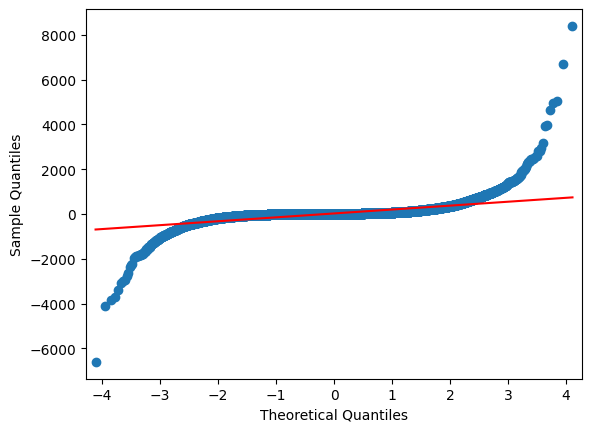

In [85]:
normality_check = new_data["Profit"]
qqplot(normality_check, line="s")
plt.show()

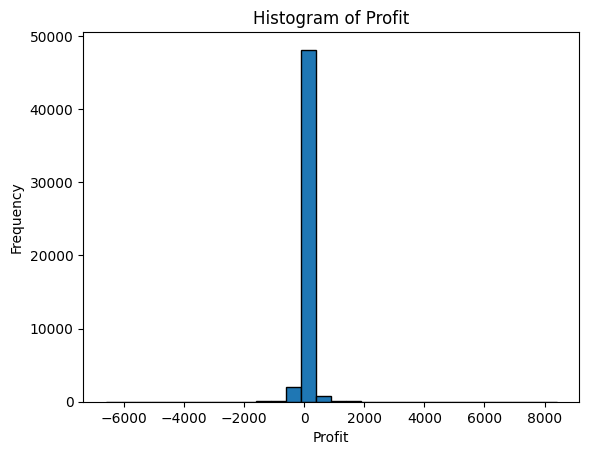

In [86]:
#Normality check 2
# Plotting the histogram for Profit
plt.hist(new_data['Profit'], bins=30, edgecolor='black')
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Perform Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(new_data['Profit'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

if p_value > 0.05:
    print("Data appears to be normally distributed (fail to reject H0).")
else:
    print("Data is not normally distributed (reject H0).")

Shapiro-Wilk Test: Stat=0.4478382879089836, p-value=1.4321003981764806e-145
Data is not normally distributed (reject H0).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51290.
  res = hypotest_fun_out(*samples, **kwds)


In [88]:
# Perform Levene's test for equal variances across regions
stat, p_value = stats.levene(*[new_data[new_data['Region'] == region]['Profit'] for region in new_data['Region'].unique()])
print(f'Levene Test: Stat={stat}, p-value={p_value}')

if p_value > 0.05:
    print("Variances are equal across groups (fail to reject H0).")
else:
    print("Variances are not equal across groups (reject H0).")

Levene Test: Stat=14.297123030684464, p-value=2.592934018694379e-30
Variances are not equal across groups (reject H0).


Since our dataset has failed in normality test,  Kruskal-Wallis test

In [109]:
from scipy.stats import kruskal
stat, p_value = kruskal(
    profit_g1, profit_g2, profit_g3, profit_g4, profit_g5, profit_g6,
    profit_g7, profit_g8, profit_g9, profit_g10, profit_g11, profit_g12, profit_g13
)

print("\nKruskal-Wallis Test for Profit vs Random Region Group:")
print("Test statistic:", stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: At least one random group has a different distribution of profit.")
else:
    print("Fail to reject H0: All random groups have the same distribution of profit.")


Kruskal-Wallis Test for Profit vs Random Region Group:
Test statistic: 13.761405113009443
P-value: 0.31620337263796416
Fail to reject H0: All random groups have the same distribution of profit.


In [112]:
new_data = data.copy(deep=True)

In [115]:
#Since the selected data columns doesnot follow normal distribution its better to use spearman corelation on these columns

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

corr, p_value = spearmanr(new_data['Profit'], new_data['Region'])

print("Spearman's Correlation Coefficient:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")



Spearman's Correlation Coefficient: -0.0072194539422763765
P-value: 0.10205061251738644
The correlation is not statistically significant.


In [130]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,month,Profit Margin,Profit_Margin,year,day,Time Gap (Days),Random Region Group
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,762.1845,933.57,Critical,7,33.000000,33.000000,2012,31,0,g13
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,-288.7650,923.63,Critical,2,-7.784693,-7.784693,2013,5,2,g6
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,919.9710,915.49,Medium,10,17.776630,17.776630,2013,17,1,g1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,-96.5400,910.16,Medium,1,-3.337586,-3.337586,2013,28,2,g4
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,311.5200,903.04,Critical,11,10.996272,10.996272,2013,5,1,g12


In [131]:
data.describe(include = ['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority,Random Region Group
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,632,7,13,10292,3,17,3788,4,13
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,Unknown,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium,g5
freq,14,30775,97,108,26518,915,2001,9994,41296,11002,11117,35,31273,6152,227,29433,4015


In [134]:
data.drop('Random Region Group', axis = 1, inplace = True)

In [138]:
numeric_data = data.select_dtypes(include=[float, int])

# Calculate kurtosis for numeric columns
kurtosis_values = numeric_data.kurt()
print(kurtosis_values)

Row ID              -1.200000
Sales              176.731200
Quantity             2.275889
Discount             0.716682
Profit             291.411090
Shipping Cost       50.020158
month               -0.977879
Profit Margin        6.991184
Profit_Margin        6.991184
year                -1.222033
day                 -1.189482
Time Gap (Days)     -0.250011
dtype: float64


In [140]:
#as previously it was clear that the dataset has numerous outliers in it.
#Outliers detection

num_new_data = data.select_dtypes(include = np.number)
num_new_data

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,month,Profit Margin,Profit_Margin,year,day,Time Gap (Days)
0,32298,2309.650,7,0.0,762.1845,933.57,7,33.000000,33.000000,2012,31,0
1,26341,3709.395,9,0.1,-288.7650,923.63,2,-7.784693,-7.784693,2013,5,2
2,25330,5175.171,9,0.1,919.9710,915.49,10,17.776630,17.776630,2013,17,1
3,13524,2892.510,5,0.1,-96.5400,910.16,1,-3.337586,-3.337586,2013,28,2
4,47221,2832.960,8,0.0,311.5200,903.04,11,10.996272,10.996272,2013,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,65.100,5,0.0,4.5000,0.01,6,6.912442,6.912442,2014,19,0
51286,35398,0.444,1,0.8,-1.1100,0.01,6,-250.000000,-250.000000,2014,20,4
51287,40470,22.920,3,0.0,11.2308,0.01,12,49.000000,49.000000,2013,2,0
51288,9596,13.440,2,0.0,2.4000,0.00,2,17.857143,17.857143,2012,18,4


In [148]:
num_new_data

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Profit Margin,Profit_Margin
0,32298,2309.650,7,0.0,762.1845,933.57,33.000000,33.000000
1,26341,3709.395,9,0.1,-288.7650,923.63,-7.784693,-7.784693
2,25330,5175.171,9,0.1,919.9710,915.49,17.776630,17.776630
3,13524,2892.510,5,0.1,-96.5400,910.16,-3.337586,-3.337586
4,47221,2832.960,8,0.0,311.5200,903.04,10.996272,10.996272
...,...,...,...,...,...,...,...,...
51285,29002,65.100,5,0.0,4.5000,0.01,6.912442,6.912442
51286,35398,0.444,1,0.8,-1.1100,0.01,-250.000000,-250.000000
51287,40470,22.920,3,0.0,11.2308,0.01,49.000000,49.000000
51288,9596,13.440,2,0.0,2.4000,0.00,17.857143,17.857143


In [154]:
#lest drop 1 profit margin because its uncessary and row id
num_new_data.drop('Row ID', axis = 1, inplace = True)

In [155]:
num_new_data

,Sales,Quantity,Discount,Profit,Shipping Cost,Profit_Margin
0,2309.650,7,0.0,762.1845,933.57,33.000000
1,3709.395,9,0.1,-288.7650,923.63,-7.784693
2,5175.171,9,0.1,919.9710,915.49,17.776630
3,2892.510,5,0.1,-96.5400,910.16,-3.337586
4,2832.960,8,0.0,311.5200,903.04,10.996272
...,...,...,...,...,...,...
51285,65.100,5,0.0,4.5000,0.01,6.912442
51286,0.444,1,0.8,-1.1100,0.01,-250.000000
51287,22.920,3,0.0,11.2308,0.01,49.000000
51288,13.440,2,0.0,2.4000,0.00,17.857143


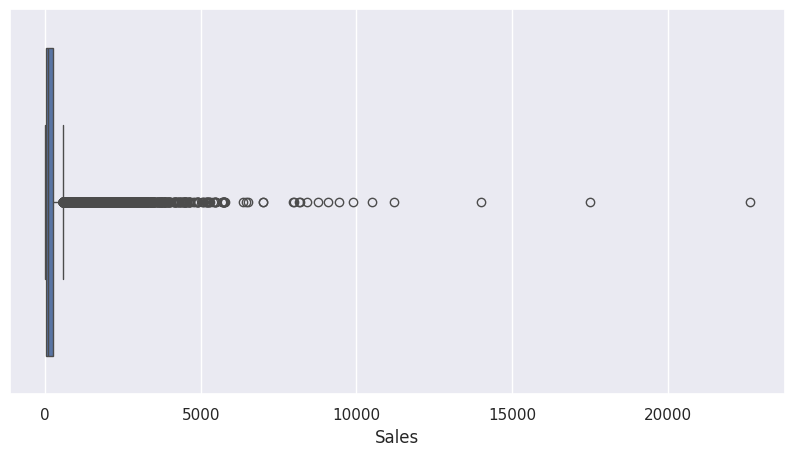

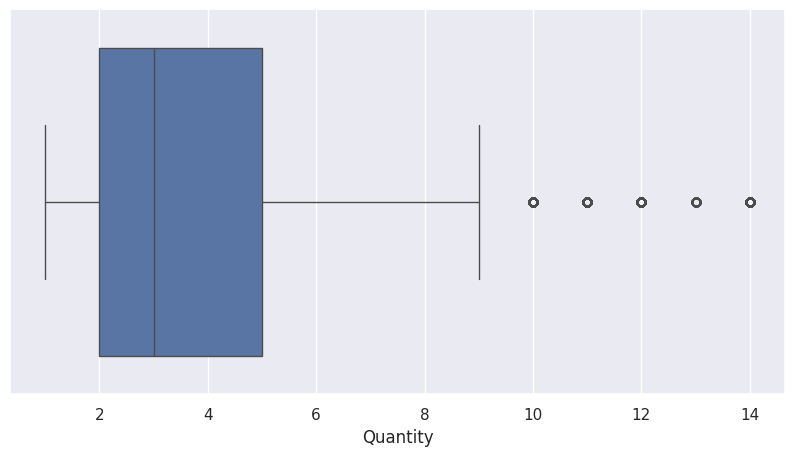

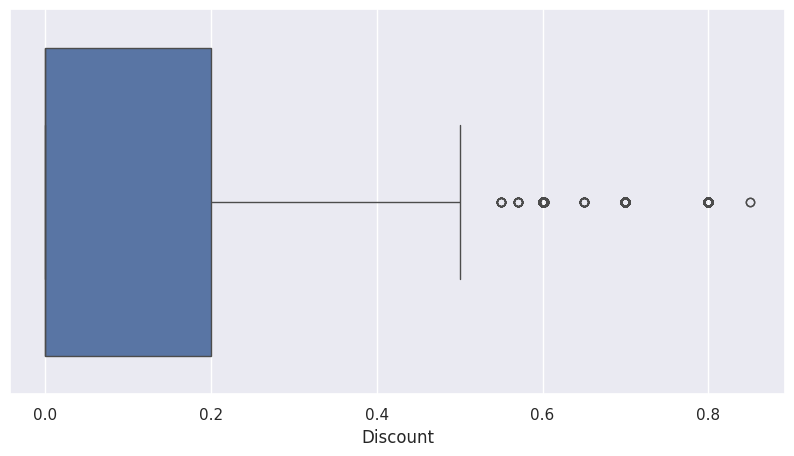

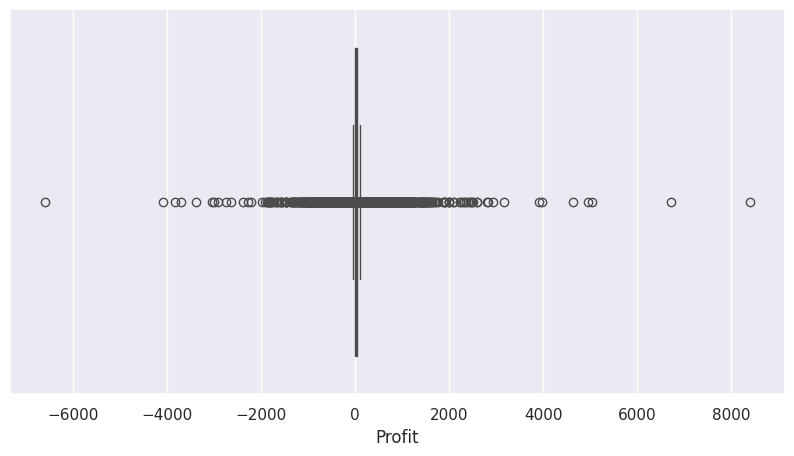

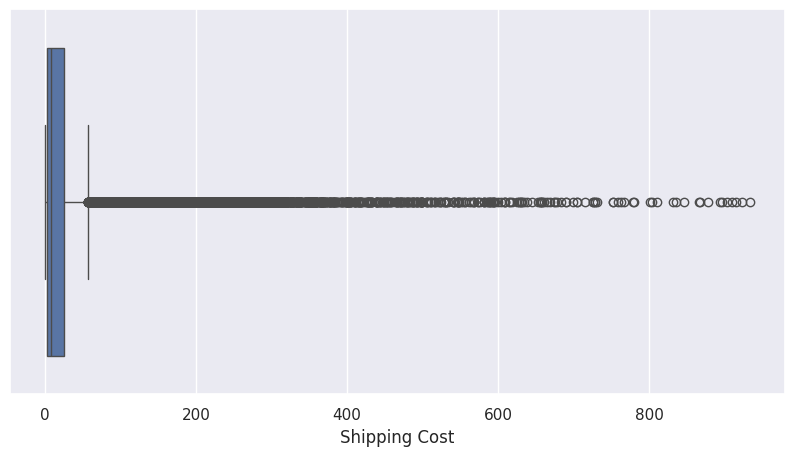

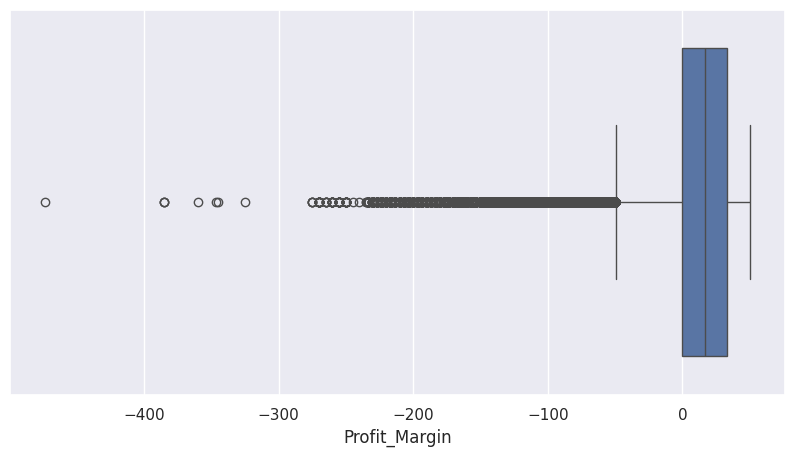

In [156]:
for col in enumerate(num_new_data):
    sns.boxplot(x=col[1],data=num_new_data)
    plt.show()

In [158]:
#Using IQR
Q1 = num_new_data.quantile(0.25)

# obtain the third quartile
Q3 = num_new_data.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Sales            220.294575
Quantity           3.000000
Discount           0.200000
Profit            36.810000
Shipping Cost     21.840000
Profit_Margin     33.313913
dtype: float64


In [177]:
num_new_data.shape

(51290, 6)

In [178]:
Q1 = num_new_data.quantile(0.25)
Q3 = num_new_data.quantile(0.75)
IQR = Q3 - Q1

# Now perform the filtering
df_iqr = num_new_data[~((num_new_data < (Q1 - 1.5 * IQR)) | (num_new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [175]:
df_iqr.shape

(35226, 30)

# Insights Derived from the Sales Performance Dashboard/Analysis


1. City-Level Profit Analysis
Top Performing Cities:

New York City: Highest profit at $62,036.98
Los Angeles: $30,440.76
Seattle: $29,156.10
Bottom Performing Cities:

Lagos: Lowest profit at -$25,922.51
Istanbul: -$19,960.91
Tegucigalpa: -$15,007.42
Insights: Cities with high profits are major metropolitan areas with significant market activity. Conversely, cities with negative profits likely face challenges in profitability, possibly due to higher costs or lower revenue generation.

2. Regional Profit Analysis
Top Regions by Profit:

Central: Highest total profit with significant contributions across months.
North America: Consistently high profit in various months.
Regions with Lower Profit:

Africa and Central Asia: These regions showed lower profitability, potentially due to higher operational costs or lower sales volume.
Insights: Regions like Central and North America are key profit drivers. Regions with lower profits should be evaluated for cost reduction strategies or market expansion opportunities.

3. Shipping Cost Analysis
Top Cities by Total Shipping Cost:

New York City: Highest total shipping cost at $26,948.17
Victoria Falls: Lowest total shipping cost at $0.09
Insights: High shipping costs in cities like New York City suggest significant logistical expenses, which may impact overall profitability. Addressing shipping costs can improve profit margins.

4. Product and Category Analysis
Top Products by Sales:

Technology (Phones) in the Central region had the highest sales of $370,198.04.
Furniture (Chairs) also showed strong sales in the Central region.
Insights: Technology products, particularly phones, are top sellers. Focus on high-performing product categories and regions to optimize sales strategies.

5. Customer and Segment Analysis
Number of Customers: Analysis of the number of customers across cities revealed varying customer densities, which can inform targeted marketing and sales strategies.

Average Discount by Segment:

EMEA had the highest average discount at 0.1967.
North Asia had the lowest at 0.0500.
Insights: Customer segments and regions with higher average discounts may experience lower profit margins. Balancing discount strategies with profitability is crucial.

6. Statistical Tests Results
ANOVA (Profit vs. Region):

Result: Significant differences in mean profit across regions.
Conclusion: Target high-performing regions for strategic growth and investigate low-performing regions for potential improvements.
Kruskal-Wallis Test (Profit vs. Random Region Groups):

Result: Significant differences in median profits across random groups.
Conclusion: The median profit varies significantly between groups, reinforcing the need for tailored strategies.
Spearman Correlation (Profit vs. Shipping Cost):

Result: Indicated a negative relationship between profit and shipping cost.
Conclusion: Higher shipping costs are associated with lower profits, highlighting the need to optimize logistics.
Summary
Leading Regions: Central and North America.
Top Cities: New York City, Los Angeles, Seattle.
High Shipping Costs: New York City, Central regions.
Top Products: Technology items, particularly phones.
Customer Insights: Segment-based discounts impact profitability, with higher discounts associated with lower profit margins.
Recommendations:

Focus on high-profit regions and cities for expansion and resource allocation.
Address shipping costs, especially in high-expense areas, to enhance profitability.
Leverage insights from high-performing products and customer segments to drive sales and marketing strategies.